In [1]:
# numerical calculation & data frames
import numpy as np
import pandas as pd

# visualization
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn.objects as so

# statistics
import statsmodels.api as sm

In [2]:
# pandas options
pd.set_option("mode.copy_on_write", True)
pd.options.display.precision = 2
pd.options.display.float_format = '{:.2f}'.format  # pd.reset_option('display.float_format')
pd.options.display.max_rows = 8

# Numpy options
np.set_printoptions(precision = 2, suppress=True)

In [3]:
"""
Seaborn.objects statistical plotting custom functions.
boxplot, rangeplot
"""

import seaborn as sns
import seaborn.objects as so


def boxplot(df, x, y, color=None, alpha=0.1, marker="<"):

    return (
        so.Plot(df, x=x, y=y, color=color)
        .add(so.Dots(alpha=alpha, color=".6"), so.Jitter(), so.Dodge())
        .add(so.Range(), so.Est("median", errorbar=("pi", 50)), so.Dodge())
        .add(so.Dot(pointsize=8, marker=marker), so.Agg("median"), so.Dodge())
        .scale(color="Dark2")
        .theme({**sns.axes_style("whitegrid")})
    )


def rangeplot(df, x, y, color=None, alpha=0.1):

    return (
        so.Plot(df, x=x, y=y, color=color)
        .add(so.Range(), so.Est("median", errorbar=("pi", 50)), so.Dodge())
        .add(so.Dots(pointsize=8, marker="<"), so.Agg("median"), so.Dodge())
        .scale(color="Dark2")
        .theme({**sns.axes_style("whitegrid")})
    )

In [4]:
df = pd.read_csv('Concrete Compressive Strength.csv')
df

Cement (component 1)(kg in a m^3 mixture)  \
0                                        540.00   
1                                        540.00   
2                                        332.50   
3                                        332.50   
...                                         ...   
1026                                     322.20   
1027                                     148.50   
1028                                     159.10   
1029                                     260.90   

      Blast Furnace Slag (component 2)(kg in a m^3 mixture)  \
0                                                  0.00       
1                                                  0.00       
2                                                142.50       
3                                                142.50       
...                                                 ...       
1026                                               0.00       
1027                                             139.40       
1028                                             186.70       
1029                                             100.50       

      Fly Ash (component 3)(kg in a m^3 mixture)  \
0                                           0.00   
1                                           0.00   
2                                           0.00   
3                                           0.00   
...                                          ...   
1026                                      115.60   
1027                                      108.60   
1028                                        0.00   
1029                                       78.30   

      Water  (component 4)(kg in a m^3 mixture)  \
0                                        162.00   
1                                        162.00   
2                                        228.00   
3                                        228.00   
...                                         ...   
1026                                     196.00   
1027                                     192.70   
1028                                     175.60   
1029                                     200.60   

      Superplasticizer (component 5)(kg in a m^3 mixture)  \
0                                                  2.50     
1                                                  2.50     
2                                                  0.00     
3                                                  0.00     
...                                                 ...     
1026                                              10.40     
1027                                               6.10     
1028                                              11.30     
1029                                               8.60     

      Coarse Aggregate  (component 6)(kg in a m^3 mixture)  \
0                                               1040.00      
1                                               1055.00      
2                                                932.00      
3                                                932.00      
...                                                 ...      
1026                                             817.90      
1027                                             892.40      
1028                                             989.60      
1029                                             864.50      

      Fine Aggregate (component 7)(kg in a m^3 mixture)  Age (day)  \
0                                                676.00         28   
1                                                676.00         28   
2                                                594.00        270   
3                                                594.00        365   
...                                                 ...        ...   
1026                                             813.40         28   
1027                                             780.00         28   
1028                                    

In [48]:
# 열 이름을 변경합니다.
df.columns = ['Cement', 'BlastFurnaceSlag', 'FlyAsh', 'Water', 'Superplasticizer', 'CoarseAggregate', 'FineAggregate', 'Age', 'ConcreteCompressiveStrength']

In [49]:
df.describe()

Cement  BlastFurnaceSlag  FlyAsh   Water  Superplasticizer  \
count 1030.00           1030.00 1030.00 1030.00           1030.00   
mean   281.17             73.90   54.19  181.57              6.20   
std    104.51             86.28   64.00   21.36              5.97   
min    102.00              0.00    0.00  121.75              0.00   
25%    192.38              0.00    0.00  164.90              0.00   
50%    272.90             22.00    0.00  185.00              6.35   
75%    350.00            142.95  118.27  192.00             10.16   
max    540.00            359.40  200.10  247.00             32.20   

       CoarseAggregate  FineAggregate     Age  ConcreteCompressiveStrength  
count          1030.00        1030.00 1030.00                      1030.00  
mean            972.92         773.58   45.66                        35.82  
std              77.75          80.18   63.17                        16.71  
min             801.00         594.00    1.00                         2.33  
25%             932.00         730.95    7.00                        23.71  
50%             968.00         779.51   28.00                        34.44  
75%            1029.40         824.00   56.00                        46.14  
max            1145.00         992.60  365.00                        82.60

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Cement                       1030 non-null   float64
 1   BlastFurnaceSlag             1030 non-null   float64
 2   FlyAsh                       1030 non-null   float64
 3   Water                        1030 non-null   float64
 4   Superplasticizer             1030 non-null   float64
 5   CoarseAggregate              1030 non-null   float64
 6   FineAggregate                1030 non-null   float64
 7   Age                          1030 non-null   int64  
 8   ConcreteCompressiveStrength  1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [51]:
df.isna().sum()

Cement                         0
BlastFurnaceSlag               0
FlyAsh                         0
Water                          0
                              ..
CoarseAggregate                0
FineAggregate                  0
Age                            0
ConcreteCompressiveStrength    0
Length: 9, dtype: int64

<ipython-input-52-383eedcbcf8b>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])
<ipython-input-52-383eedcbcf8b>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])
<ipython-input-52-383eedcbcf8b>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn

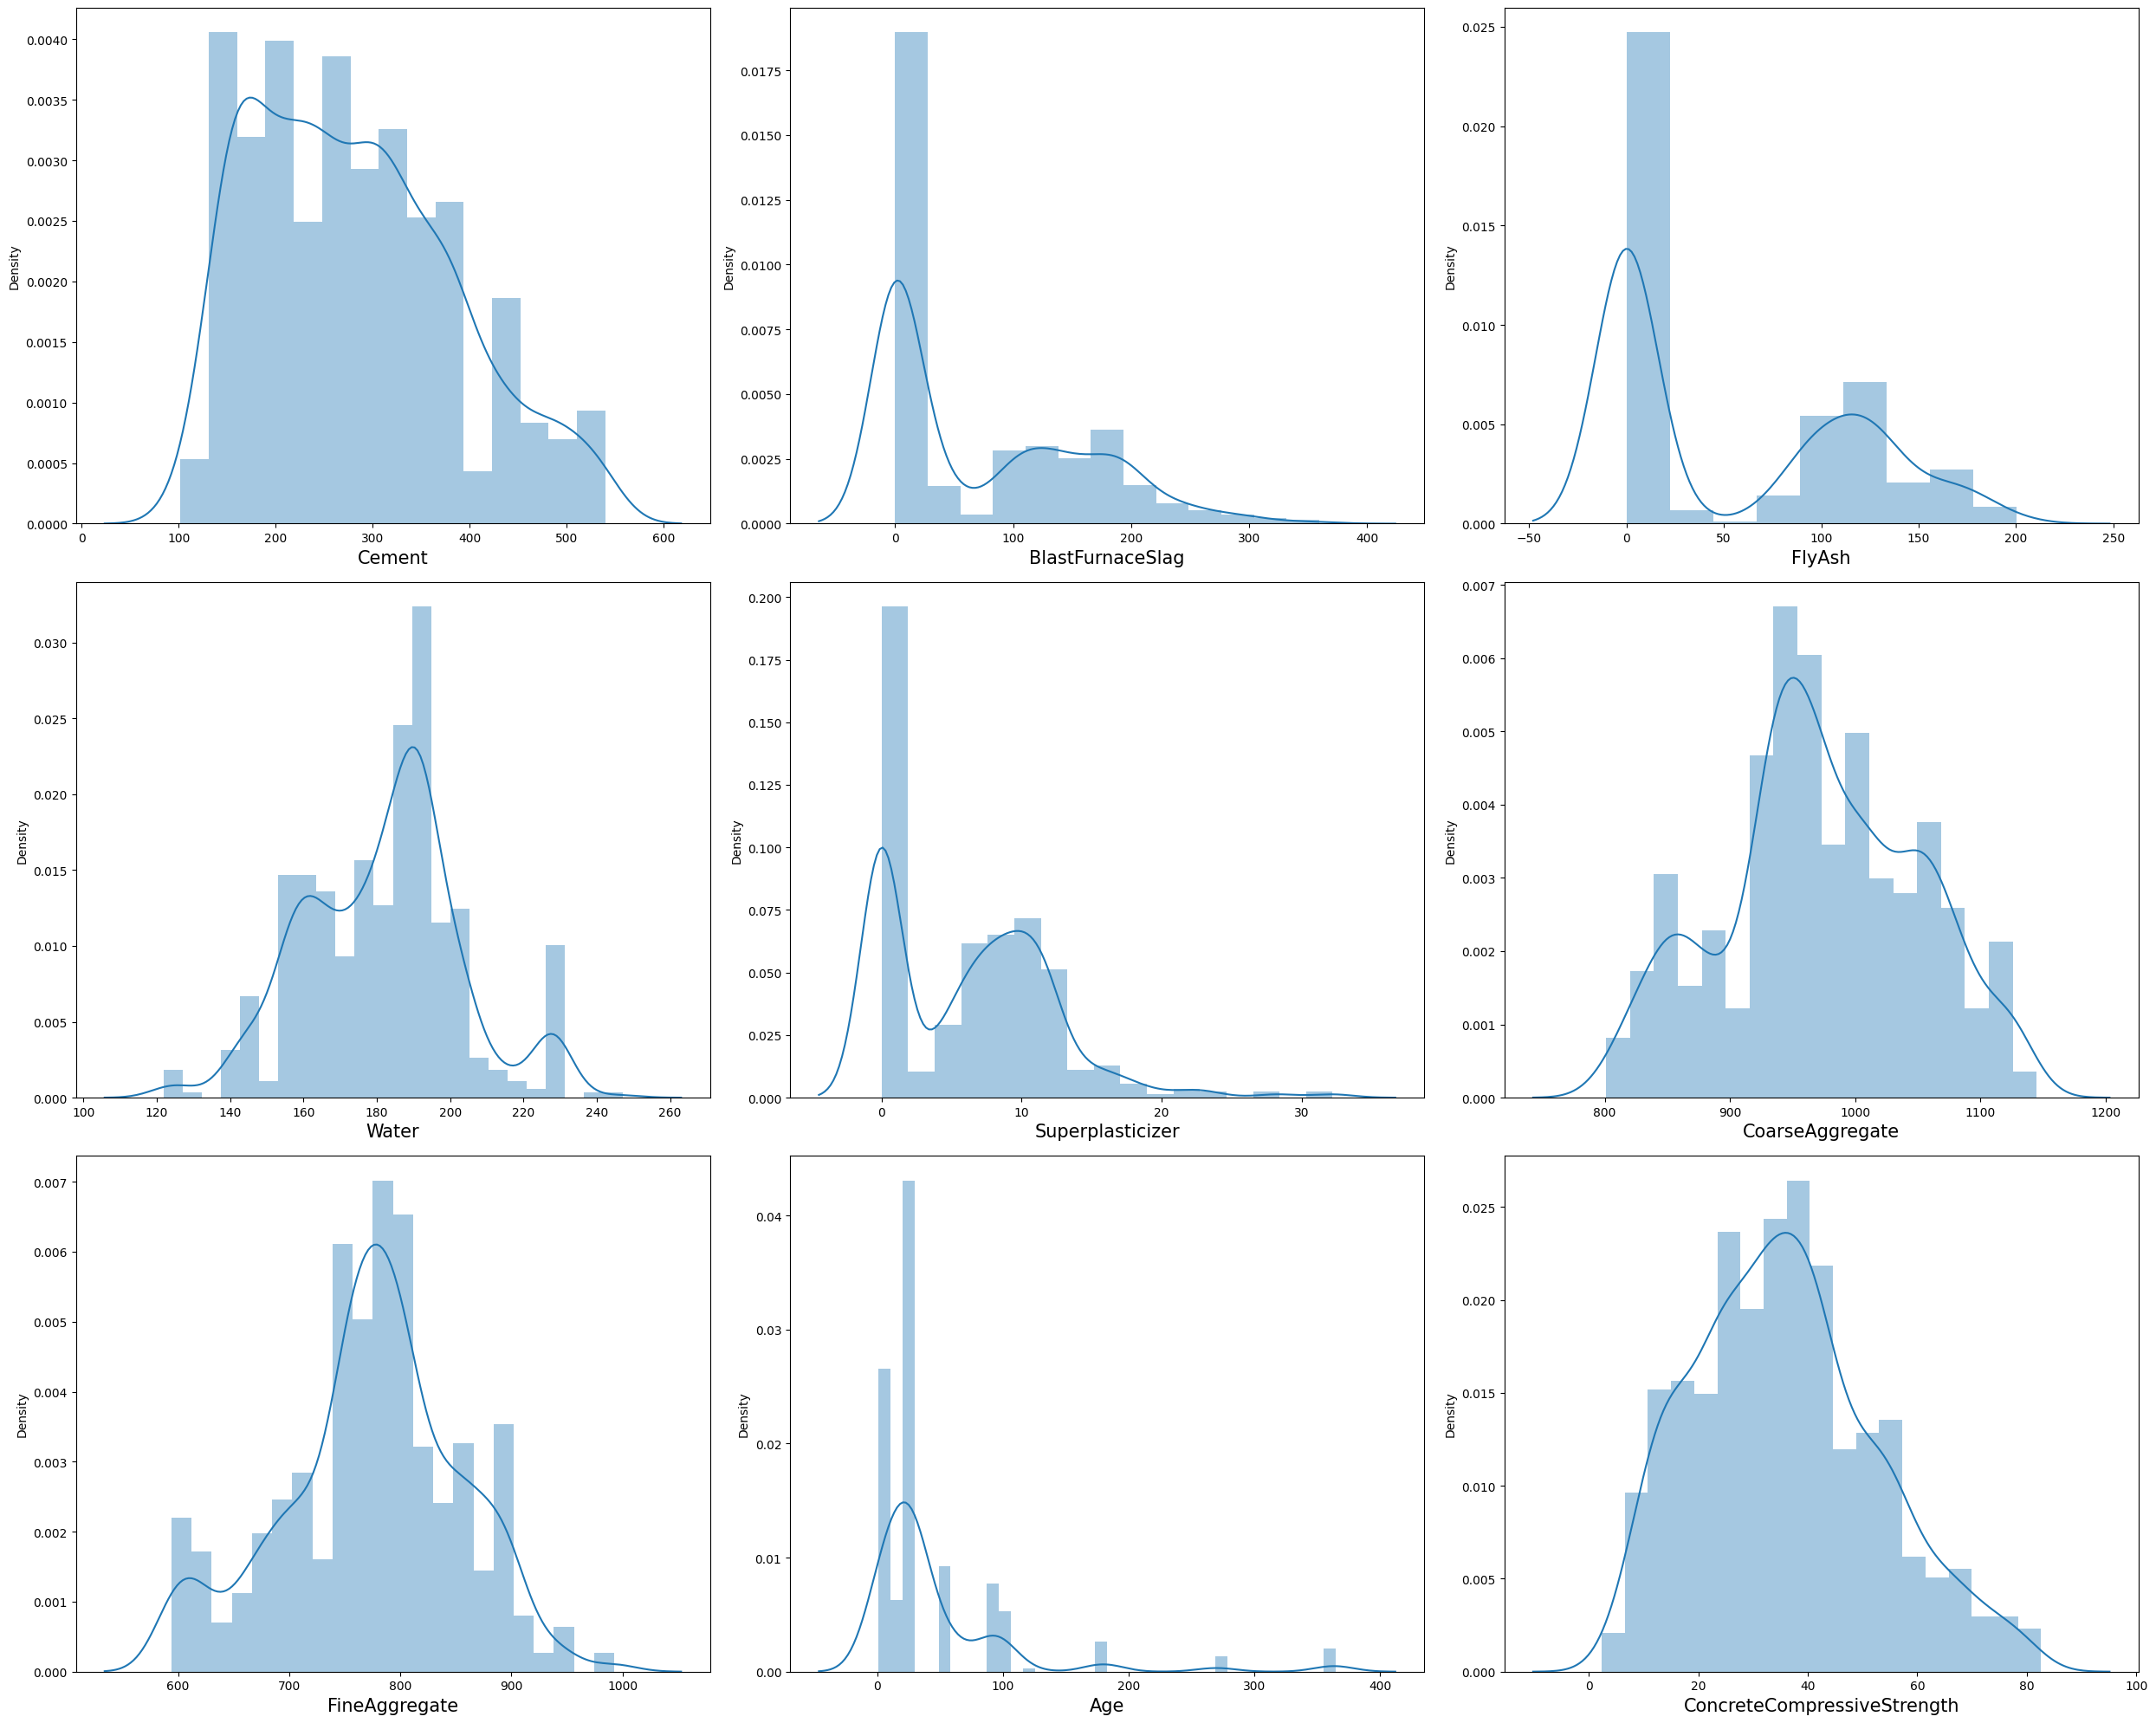

In [52]:
plt.figure(figsize = (25, 20))
plotnumber = 1

for col in df.columns:
    if plotnumber <= 9:
        ax = plt.subplot(3, 3, plotnumber)
        sns.distplot(df[col])
        plt.xlabel(col, fontsize = 15)

    plotnumber += 1

plt.tight_layout()
plt.show()

<Axes: >

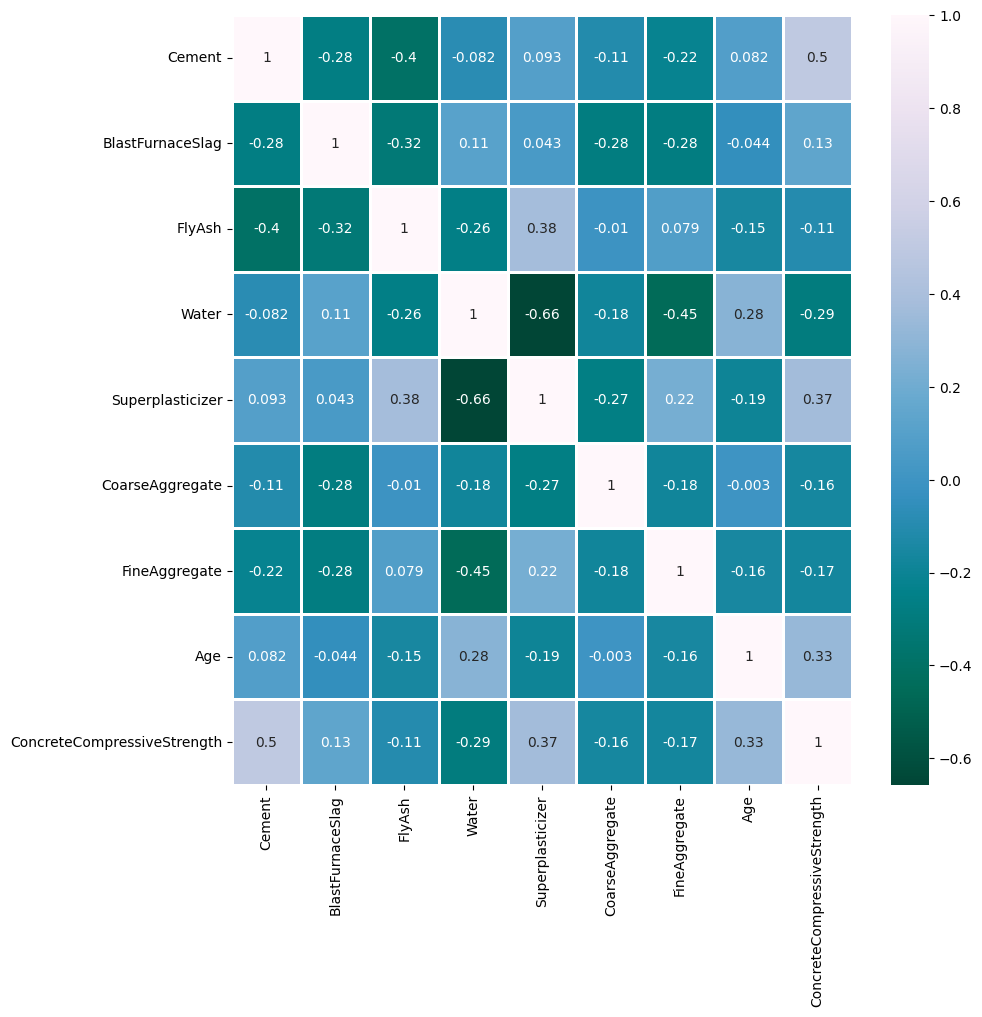

In [53]:
concrete = df
plt.figure(figsize=(10,10))
sns.heatmap(concrete.corr(),linewidths=1,cmap='PuBuGn_r',annot=True)

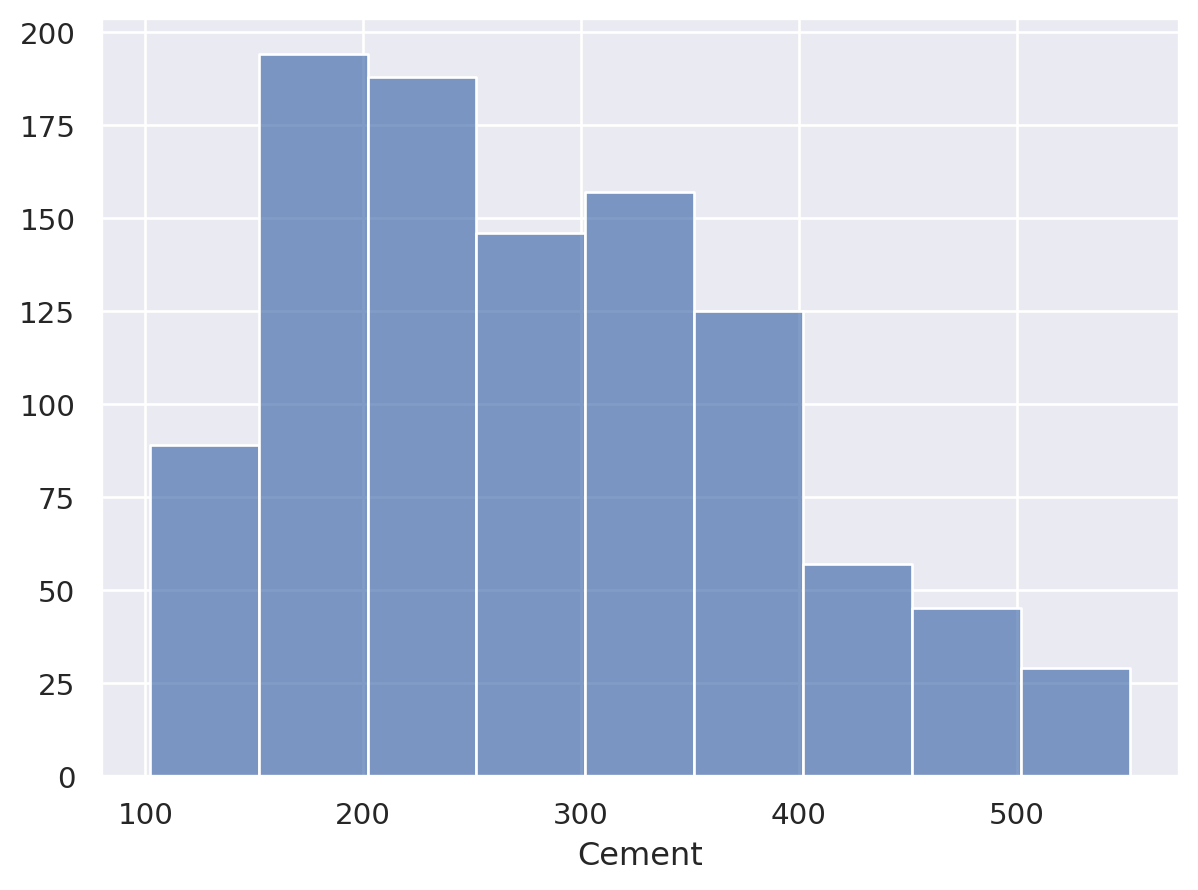

In [54]:
so.Plot(concrete, x="Cement").add(so.Bars(), so.Hist(binwidth=50))

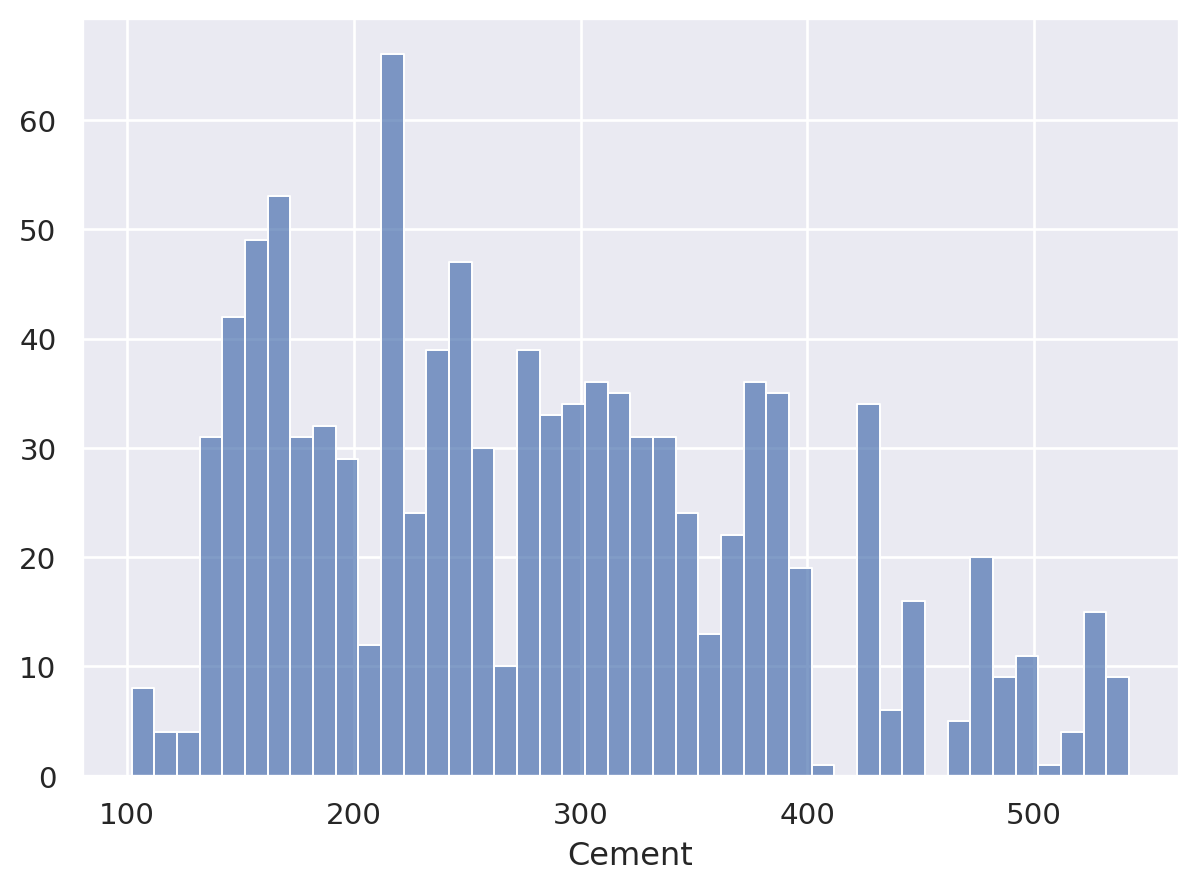

In [55]:
# Zoom-in
(
    so.Plot(concrete, x="Cement")
    .add(so.Bars(), so.Hist(binwidth=10))

)

In [56]:
concrete.value_counts("Cement")

Cement
362.60    20
425.00    20
251.37    15
446.00    14
          ..
160.20     1
315.00     1
266.20     1
152.60     1
Length: 280, dtype: int64

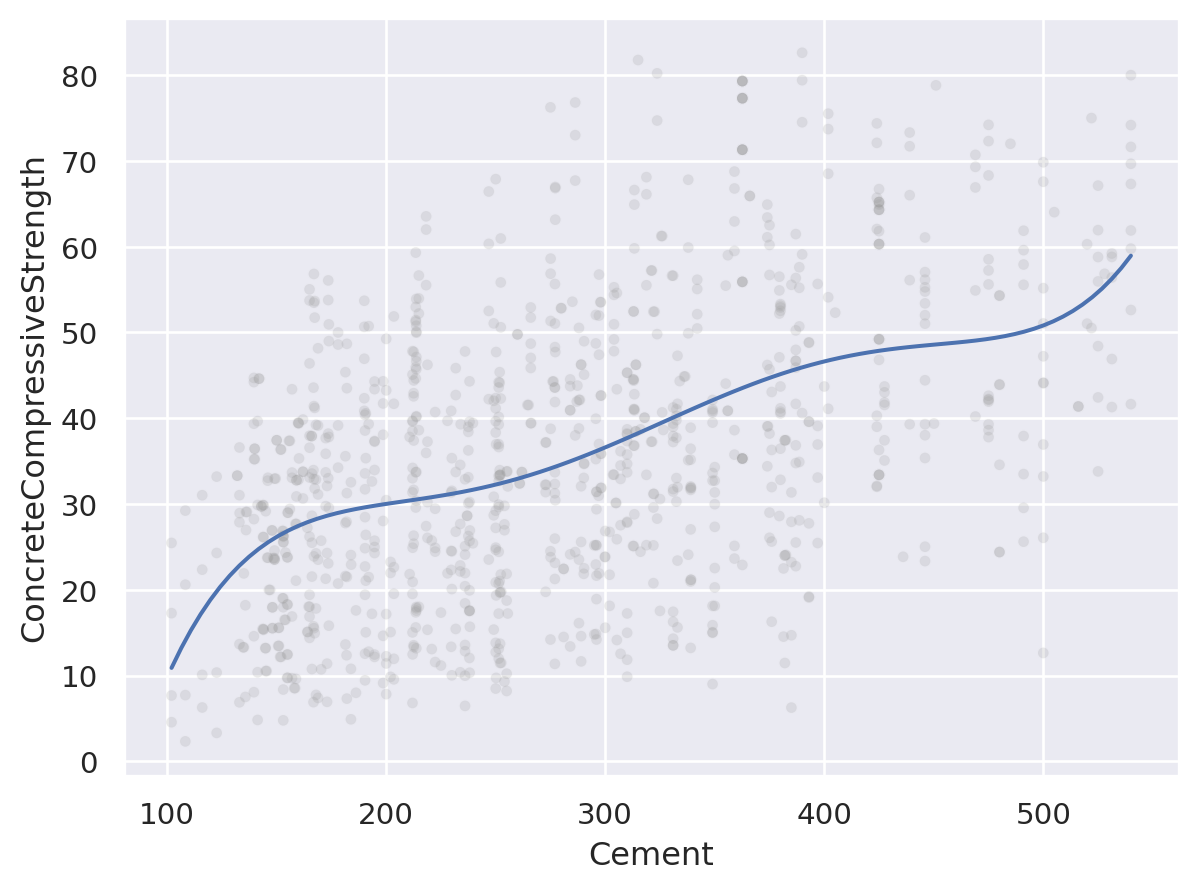

In [57]:
(
    so.Plot(concrete, x="Cement", y="ConcreteCompressiveStrength")
    .add(so.Dots(alpha=1/100, color=".6"))
    .add(so.Line(), so.PolyFit(5))
)

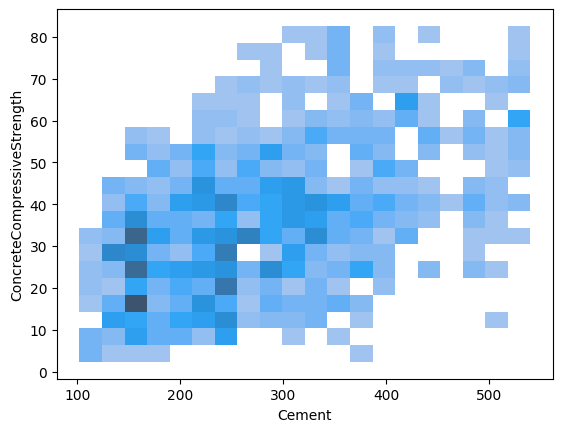

In [58]:
sns.histplot(concrete, x="Cement", y="ConcreteCompressiveStrength", bins=20)
plt.show()

In [60]:
concrete_cat = concrete.assign(
    cement_cat=lambda x: pd.cut(x.Cement, 20, labels=False),
    cement_qcat=lambda x: pd.qcut(x.Cement, 20, labels=False),
)

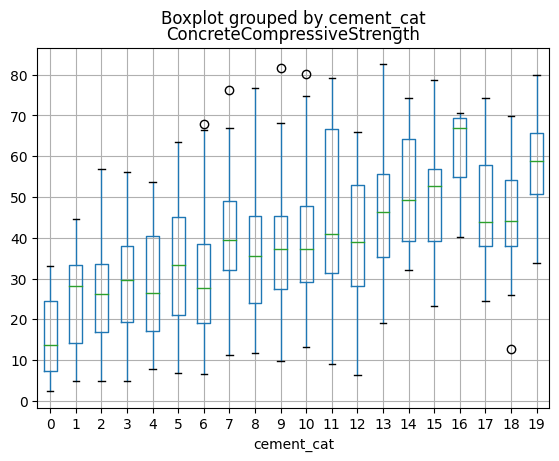

In [61]:
concrete_cat.boxplot("ConcreteCompressiveStrength", by="cement_cat")  # pandas boxplot
plt.show() # 생략

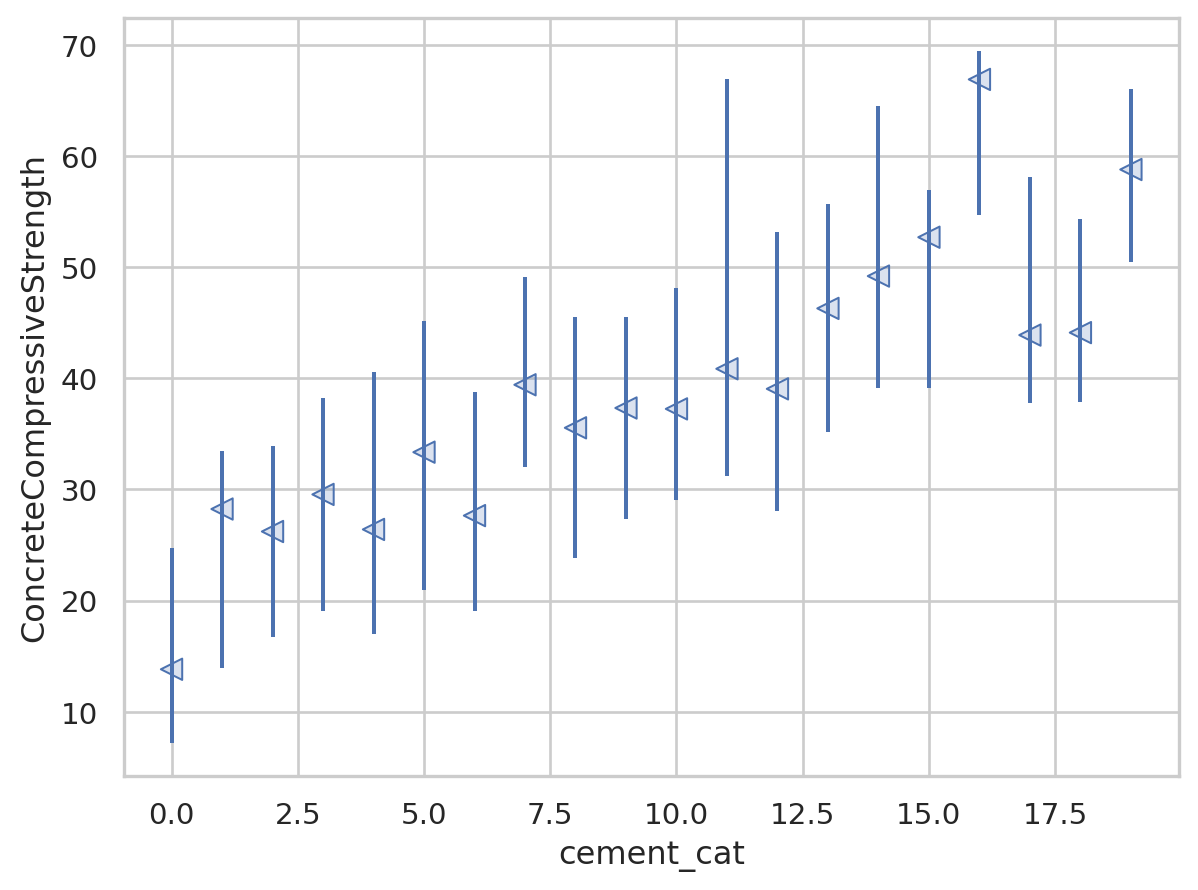

In [62]:
rangeplot(concrete_cat, x="cement_cat", y="ConcreteCompressiveStrength")

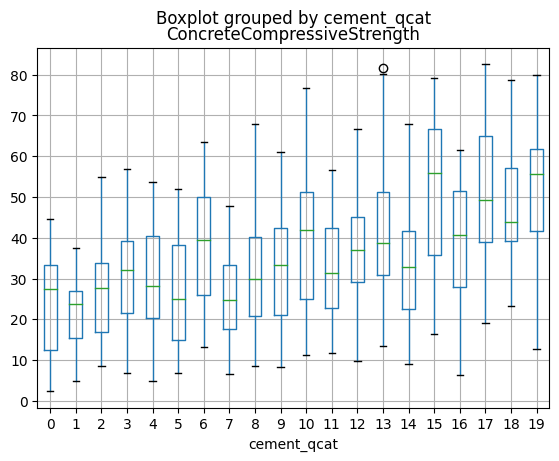

In [63]:
concrete_cat.boxplot("ConcreteCompressiveStrength", by="cement_qcat")  # pandas boxplot
plt.show() # 생략

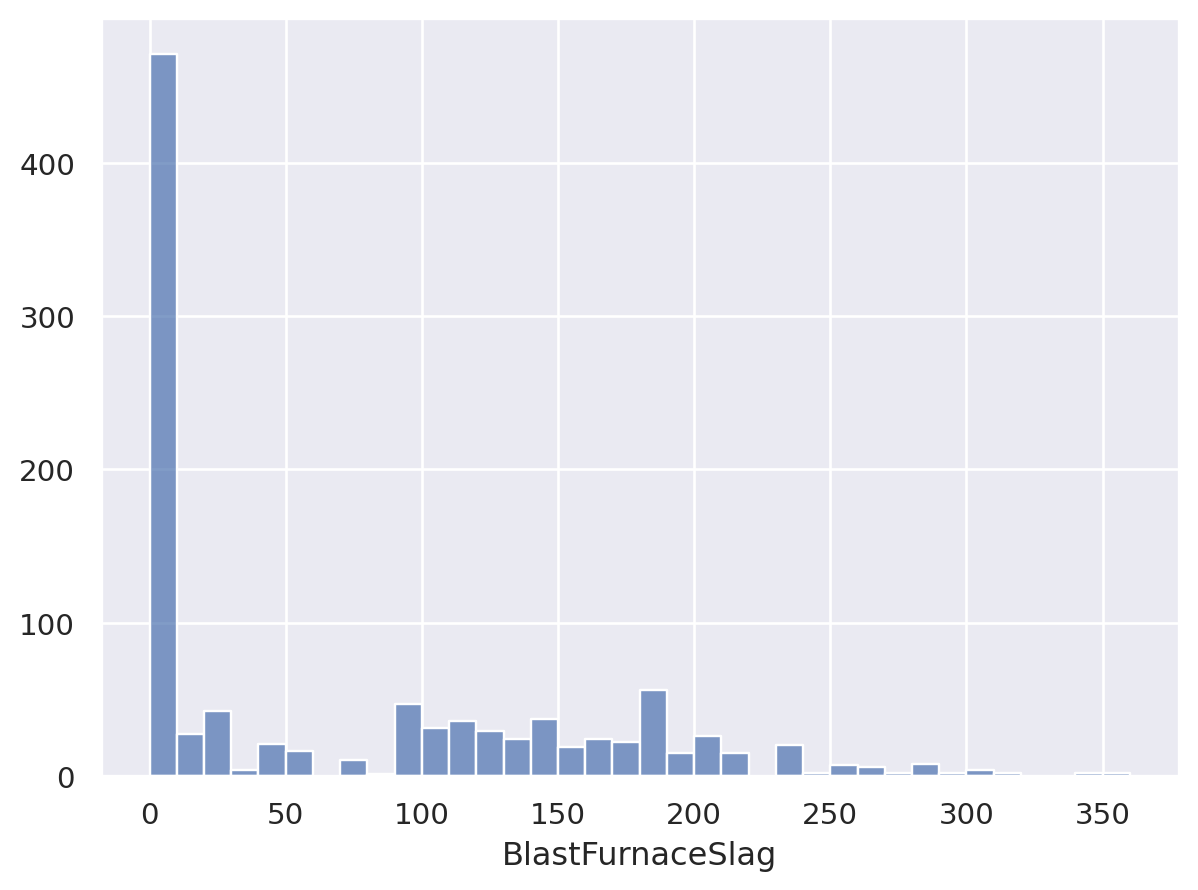

In [64]:
so.Plot(concrete, x="BlastFurnaceSlag").add(so.Bars(), so.Hist(binwidth=10))

Blast Furnace Slag는 한글로 "고로슬래그"라고 불리며, 주로 철강 제조 과정에서 발생하는 부산물입니다. 철광석을 고온으로 가열하여 철을 추출하는 고로에서 생성되는 슬래그를 의미합니다.

고로슬래그는 철을 추출하는 과정에서 철광석에 함유된 불순물들이 녹아나와 생기는 부산물로, 철광석의 주요 불순물인 광석 잔여물, 규산 칼슘, 규산 마그네슘, 규산 철 등으로 구성됩니다. 철강 제조 과정에서 고로슬래그는 분리되어 처리되거나 재활용되는데, 콘크리트 제조에서 촉진재료로 사용되기도 합니다. 콘크리트에 추가되는 고로슬래그는 강도와 내구성을 향상시키는 데 도움을 줄 수 있습니다.

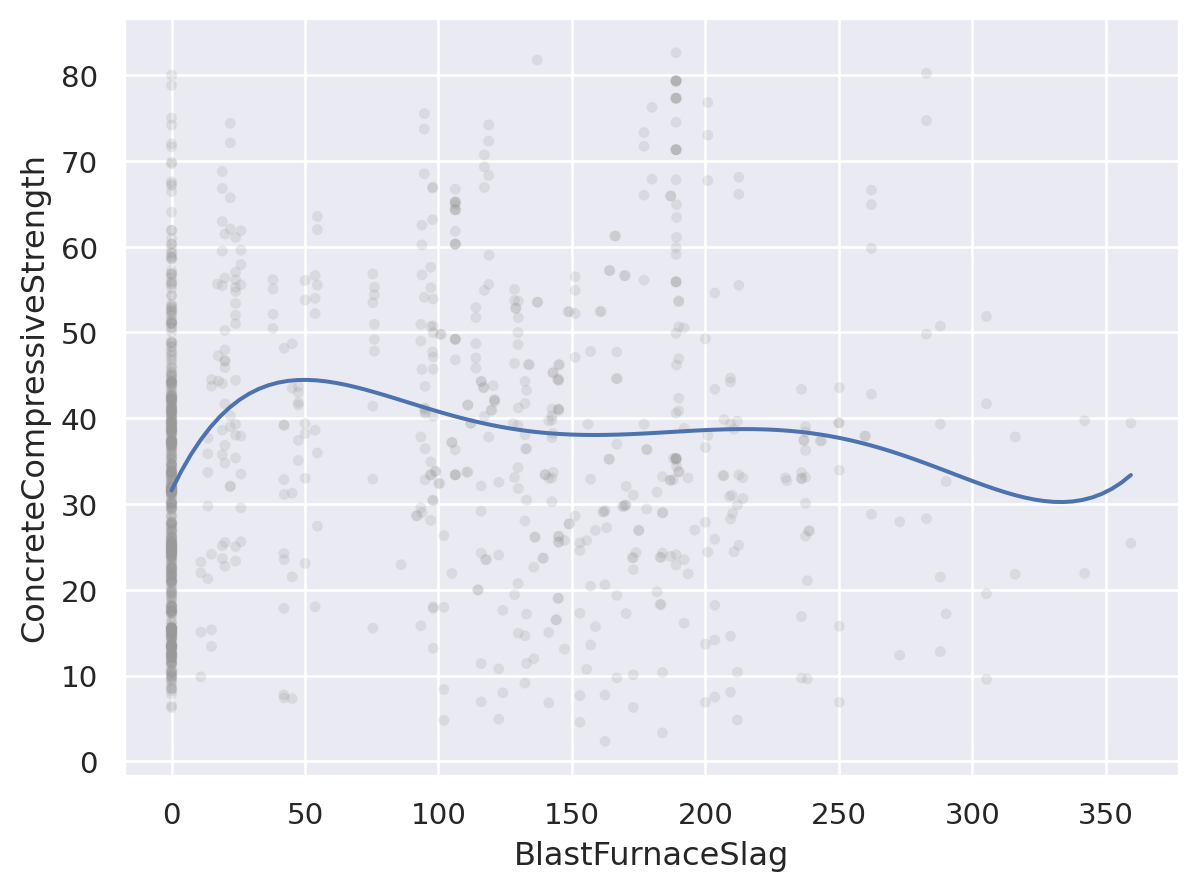

In [107]:
(
    so.Plot(concrete, x="BlastFurnaceSlag", y="ConcreteCompressiveStrength")
    .add(so.Dots(alpha=1/100, color=".6"))
    .add(so.Line(), so.PolyFit(5))
)

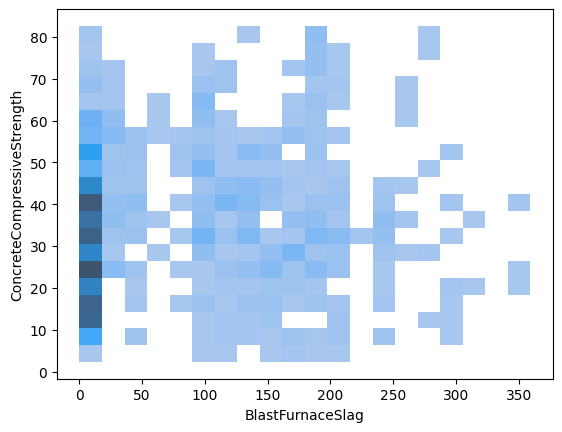

In [110]:
sns.histplot(concrete, x="BlastFurnaceSlag", y="ConcreteCompressiveStrength", bins=20)
plt.show()

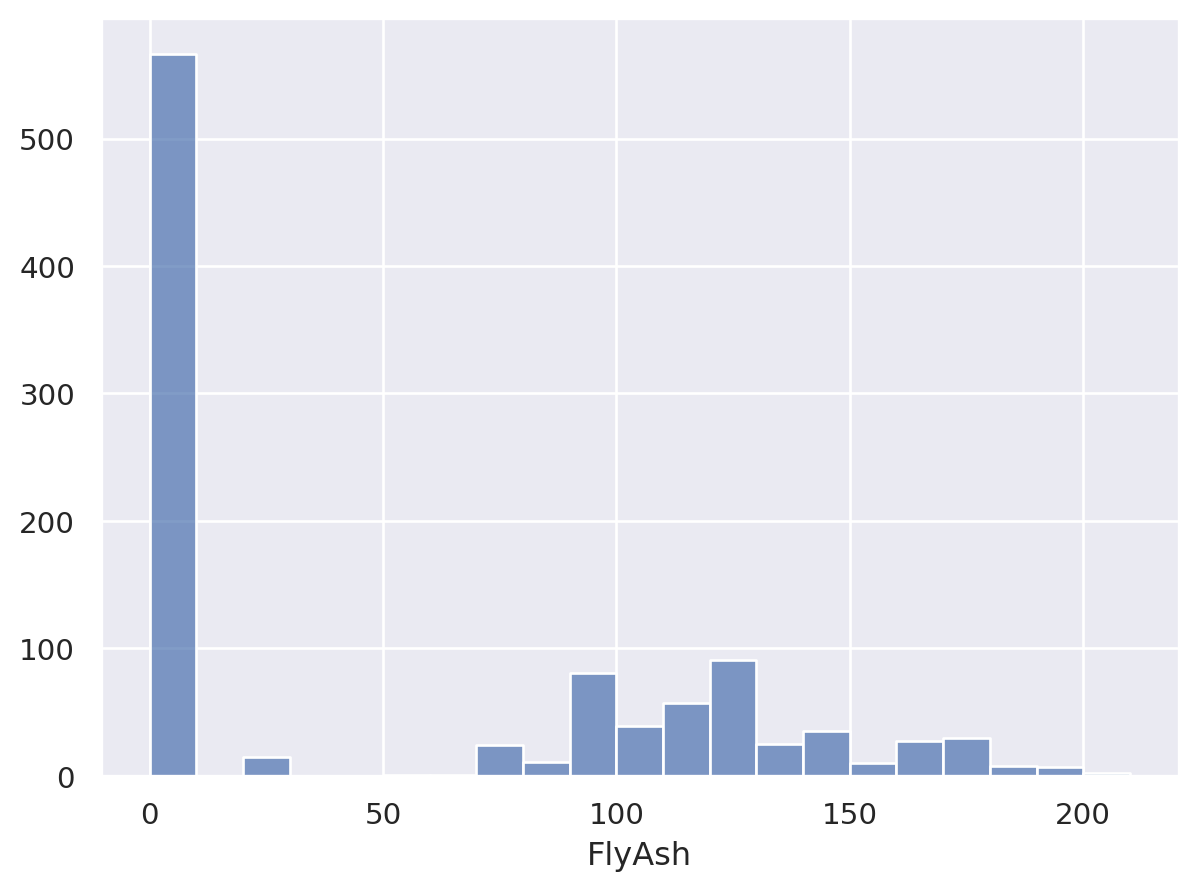

In [67]:
so.Plot(concrete, x="FlyAsh").add(so.Bars(), so.Hist(binwidth=10))

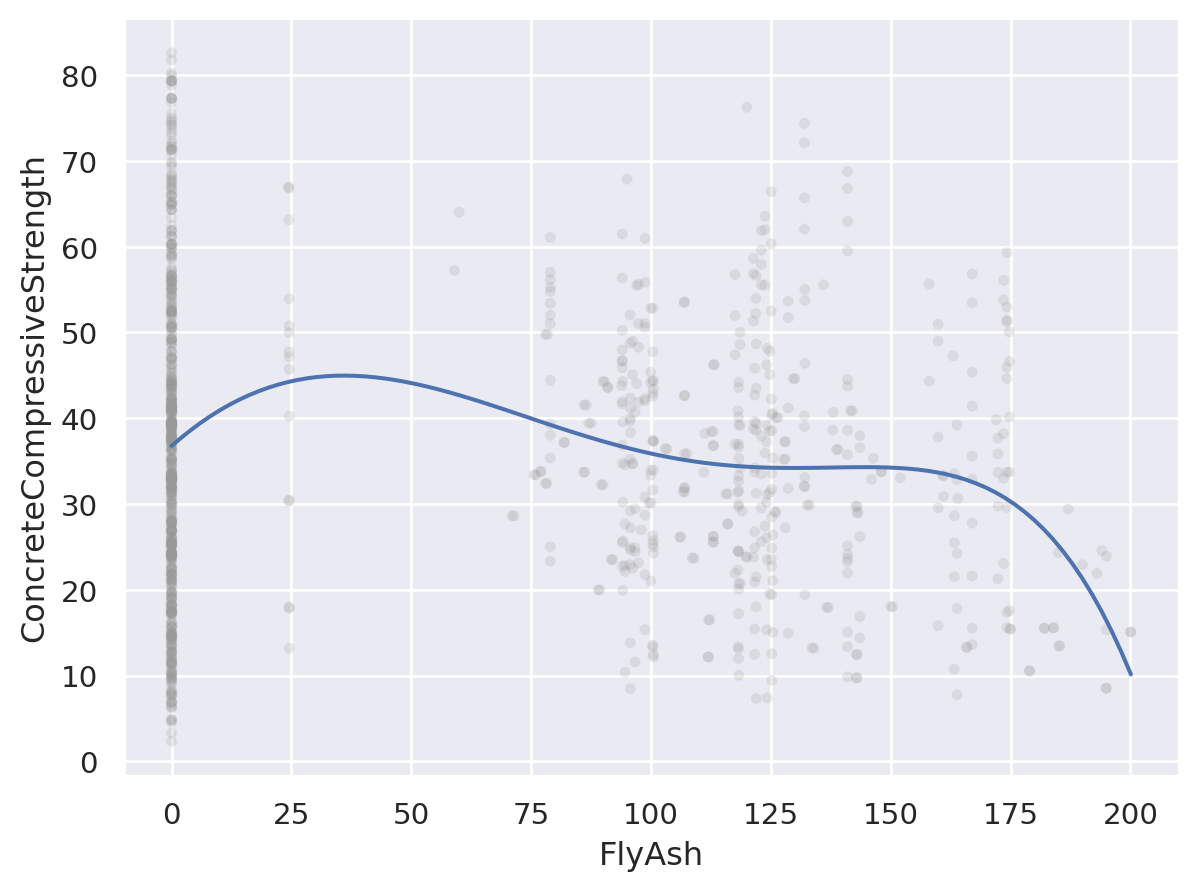

In [68]:
(
    so.Plot(concrete, x="FlyAsh", y="ConcreteCompressiveStrength")
    .add(so.Dots(alpha=1/100, color=".6"))
    .add(so.Line(), so.PolyFit(5))
)

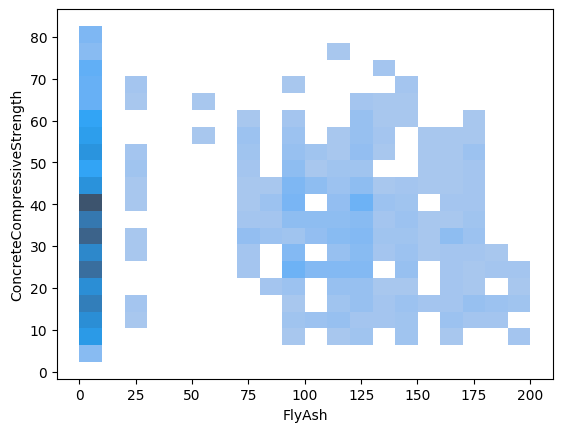

In [69]:
sns.histplot(concrete, x="FlyAsh", y="ConcreteCompressiveStrength", bins=20)
plt.show()

찌꺼기재는 콘크리트 제조에서 촉진재료로 널리 사용됩니다. 콘크리트 혼합물에 찌꺼기재를 첨가하면 콘크리트의 강도, 내구성, 화학적 안정성 등이 향상되는 효과가 있습니다. 또한, 찌꺼기재는 자원 재활용의 한 형태로 산업 부산물을 활용하는 방법 중 하나입니다.

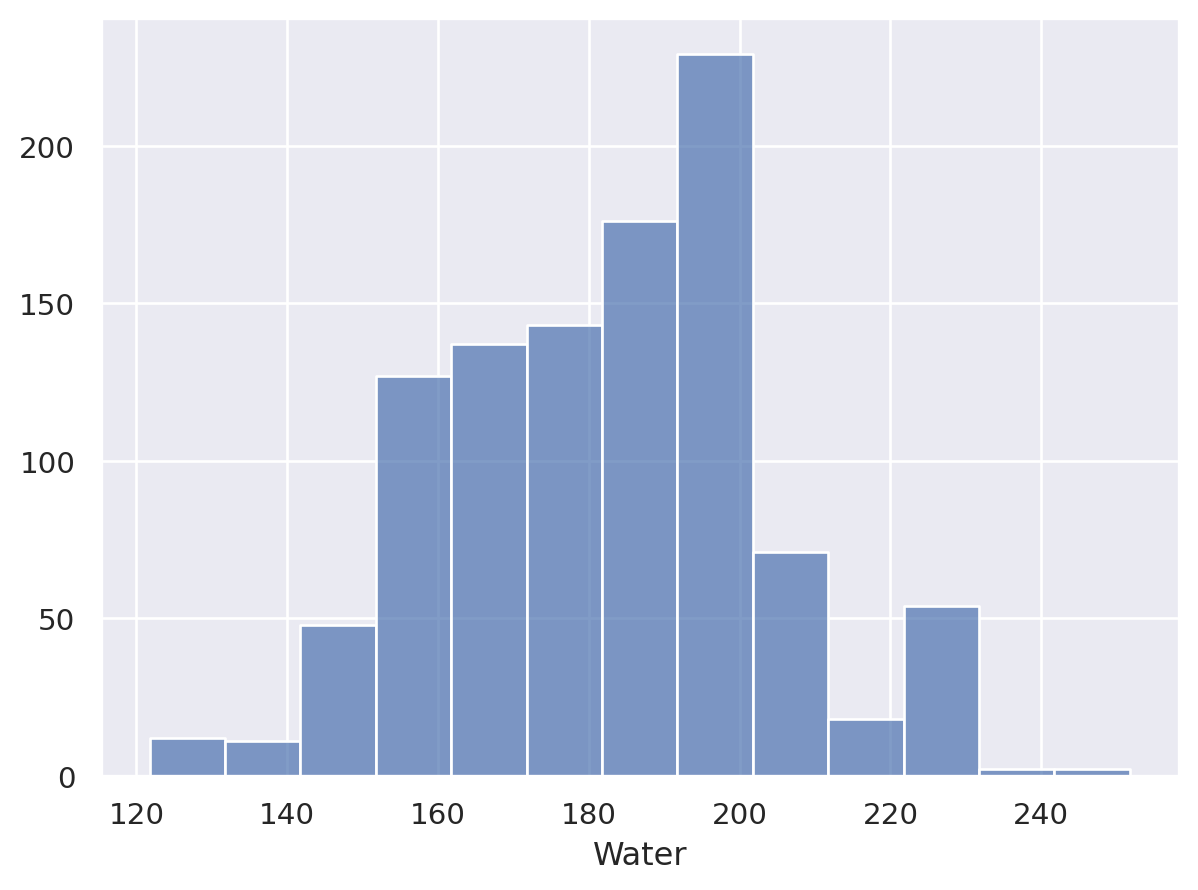

In [26]:
so.Plot(concrete, x="Water").add(so.Bars(), so.Hist(binwidth=10))

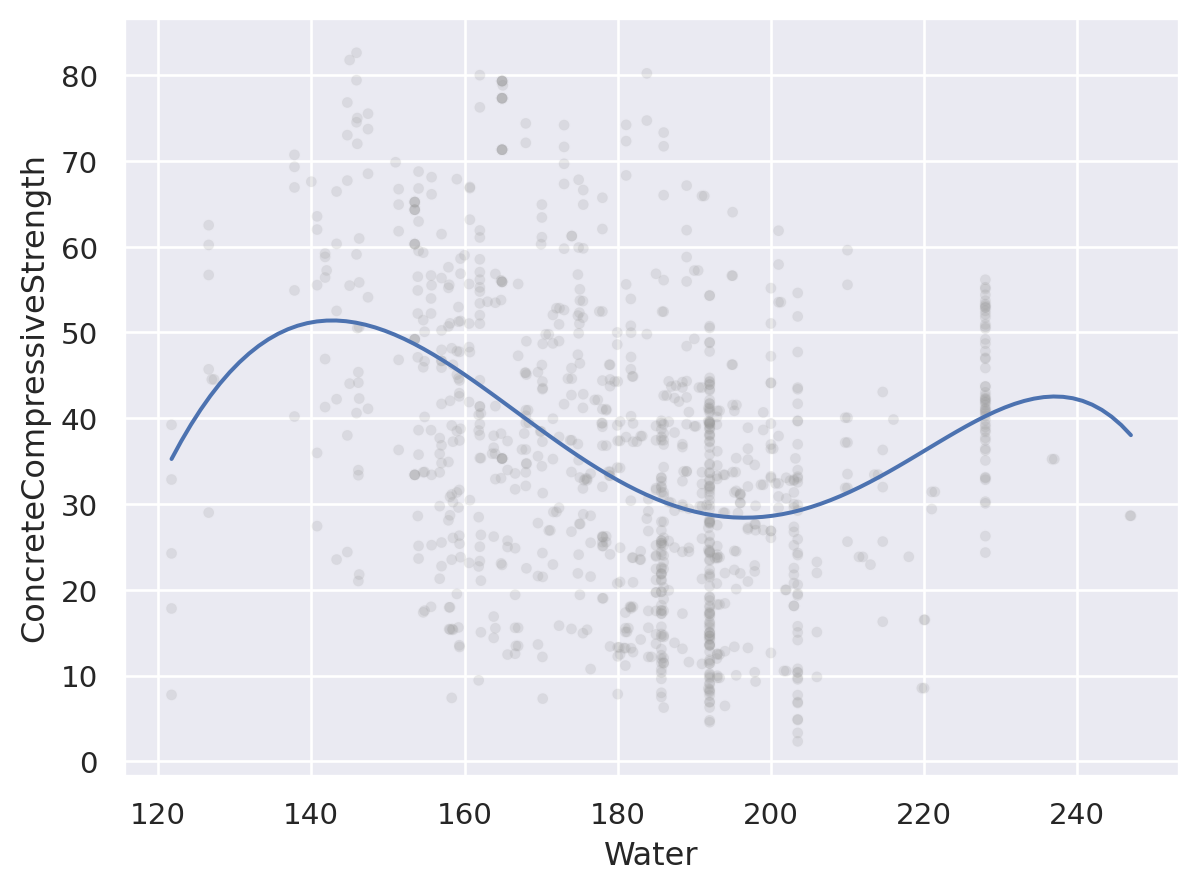

In [70]:
(
    so.Plot(concrete, x="Water", y="ConcreteCompressiveStrength")
    .add(so.Dots(alpha=1/100, color=".6"))
    .add(so.Line(), so.PolyFit(5))
)

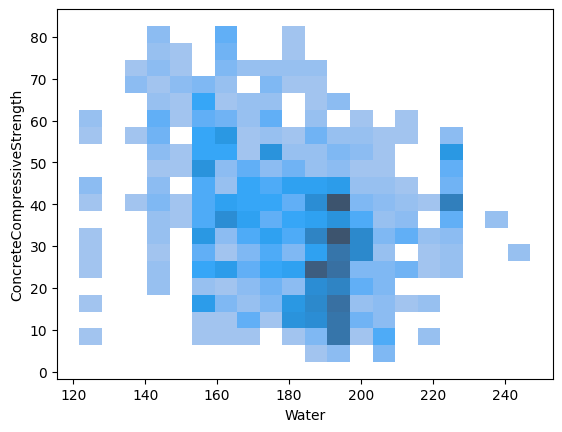

In [71]:
sns.histplot(concrete, x="Water", y="ConcreteCompressiveStrength", bins=20)
plt.show()

In [72]:
concrete_cat = concrete.assign(
    Water_cat=lambda x: pd.cut(x.Water, 20, labels=False, duplicates='drop'),
    Water_qcat=lambda x: pd.qcut(x.Water, 20, labels=False, duplicates='drop'),
)

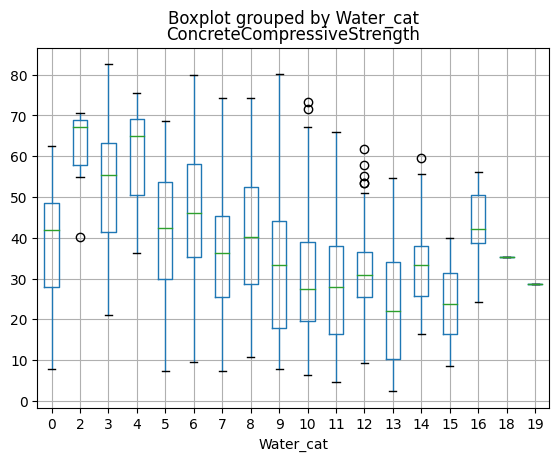

In [73]:
concrete_cat.boxplot("ConcreteCompressiveStrength", by="Water_cat")  # pandas boxplot
plt.show() # 생략

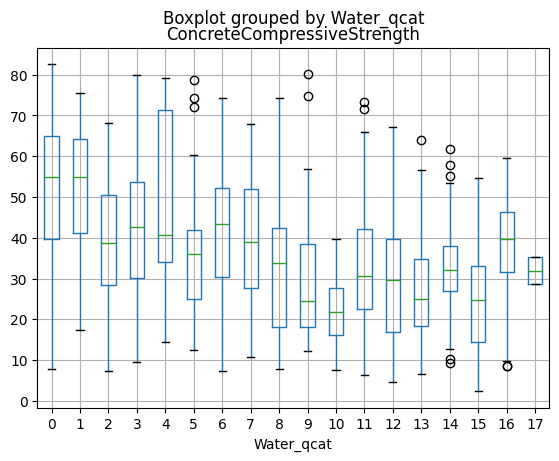

In [74]:
concrete_cat.boxplot("ConcreteCompressiveStrength", by="Water_qcat")  # pandas boxplot
plt.show() # 생략

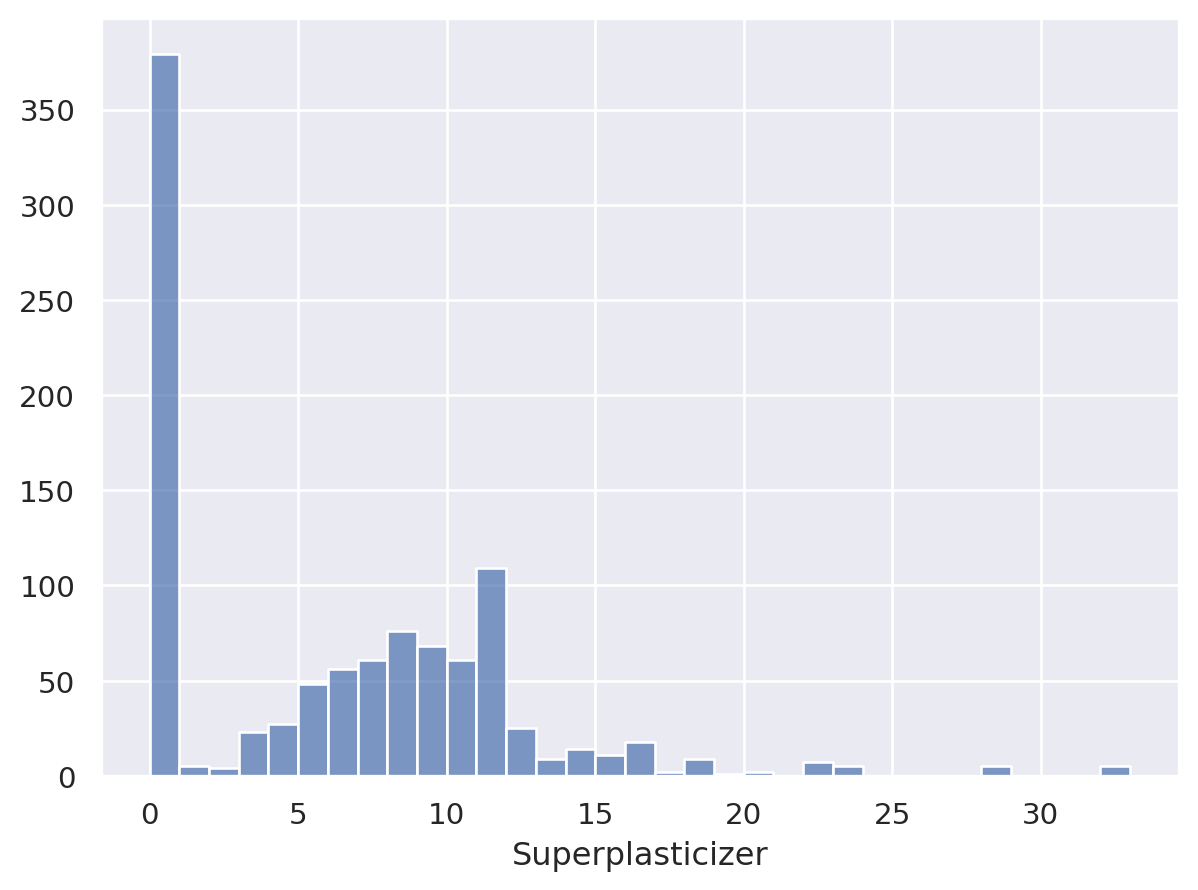

In [32]:
so.Plot(concrete, x="Superplasticizer").add(so.Bars(), so.Hist(binwidth=1))

Superplasticizer는 콘크리트 혼합물에 사용되는 화학 첨가제로, 한글로 "고효성 플라스티서"라고 번역될 수 있습니다.

고효성 플라스티서는 콘크리트 혼합물의 플라스틱성과 유동성을 향상시키는 역할을 합니다. 주로 콘크리트의 성형성과 가동성을 개선하며, 콘크리트 혼합물의 물-시멘트 비율을 조절하여 콘크리트의 흐름 특성을 조절하는 데 사용됩니다.

고효성 플라스티서는 콘크리트 혼합물의 특정한 요구 사항에 맞게 조절되며, 콘크리트 제조 과정에서 정확한 비율로 첨가됩니다. 이를 통해 콘크리트의 품질과 성능을 향상시킬 수 있습니다.

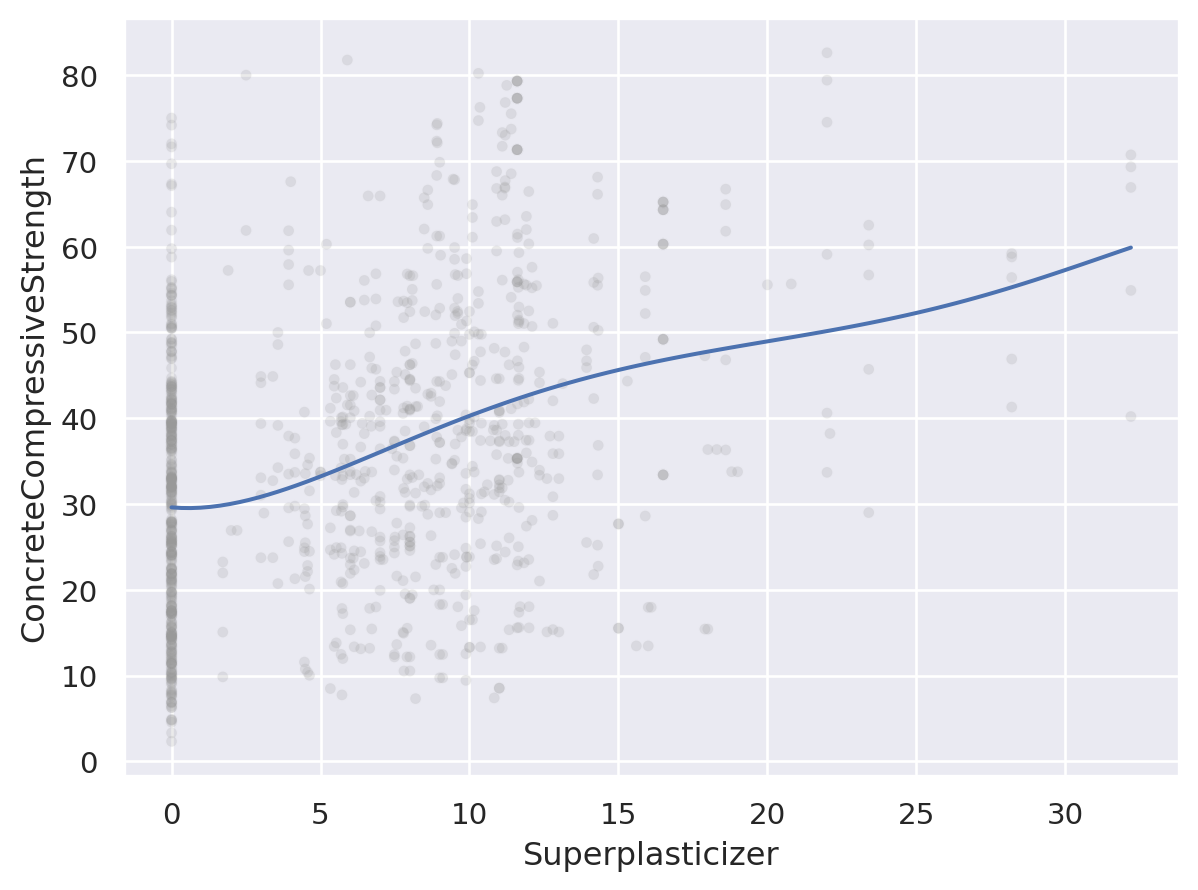

In [75]:
(
    so.Plot(concrete, x="Superplasticizer", y="ConcreteCompressiveStrength")
    .add(so.Dots(alpha=1/100, color=".6"))
    .add(so.Line(), so.PolyFit(5))
)

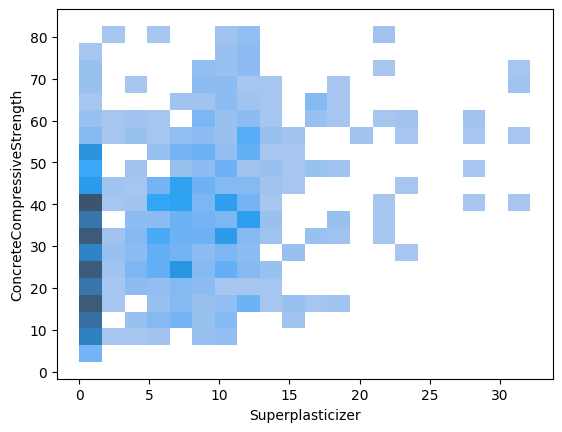

In [76]:
sns.histplot(concrete, x="Superplasticizer", y="ConcreteCompressiveStrength", bins=20)
plt.show()

In [77]:
concrete_cat = concrete.assign(
    Superplasticizer_cat=lambda x: pd.cut(x.Superplasticizer, 20, labels=False, duplicates='drop'),
    Superplasticizer_qcat=lambda x: pd.qcut(x.Superplasticizer, 20, labels=False, duplicates='drop'),
)

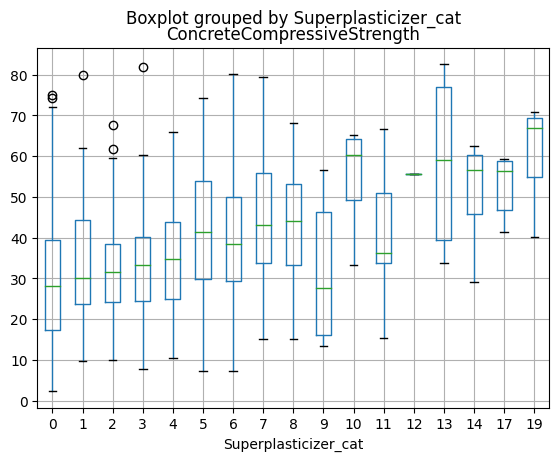

In [78]:
concrete_cat.boxplot("ConcreteCompressiveStrength", by="Superplasticizer_cat")  # pandas boxplot
plt.show() # 생략

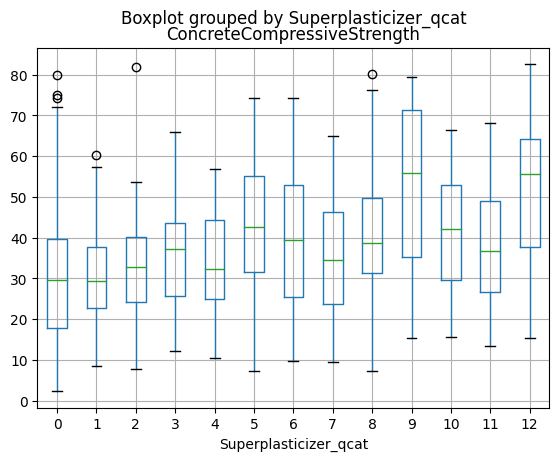

In [79]:
concrete_cat.boxplot("ConcreteCompressiveStrength", by="Superplasticizer_qcat")  # pandas boxplot
plt.show() # 생략

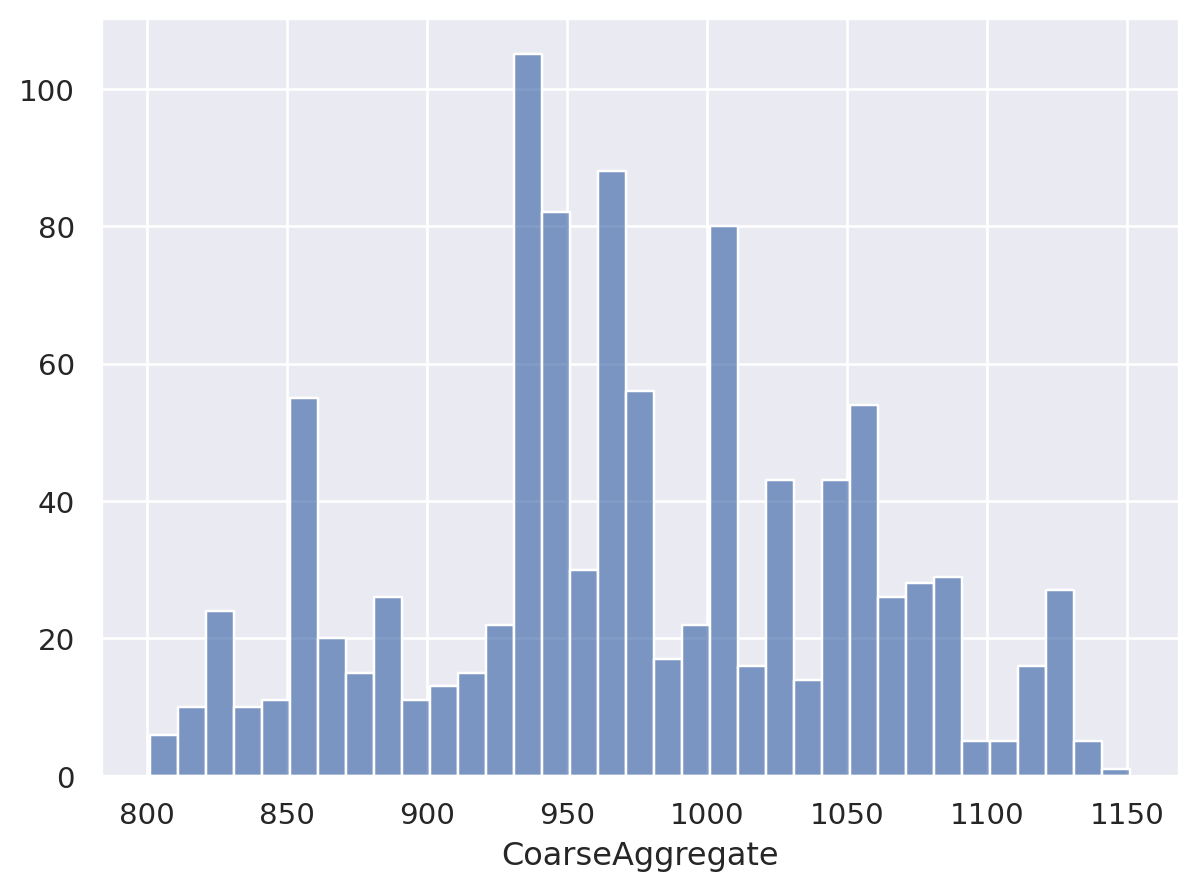

In [80]:
so.Plot(concrete, x="CoarseAggregate").add(so.Bars(), so.Hist(binwidth=10))

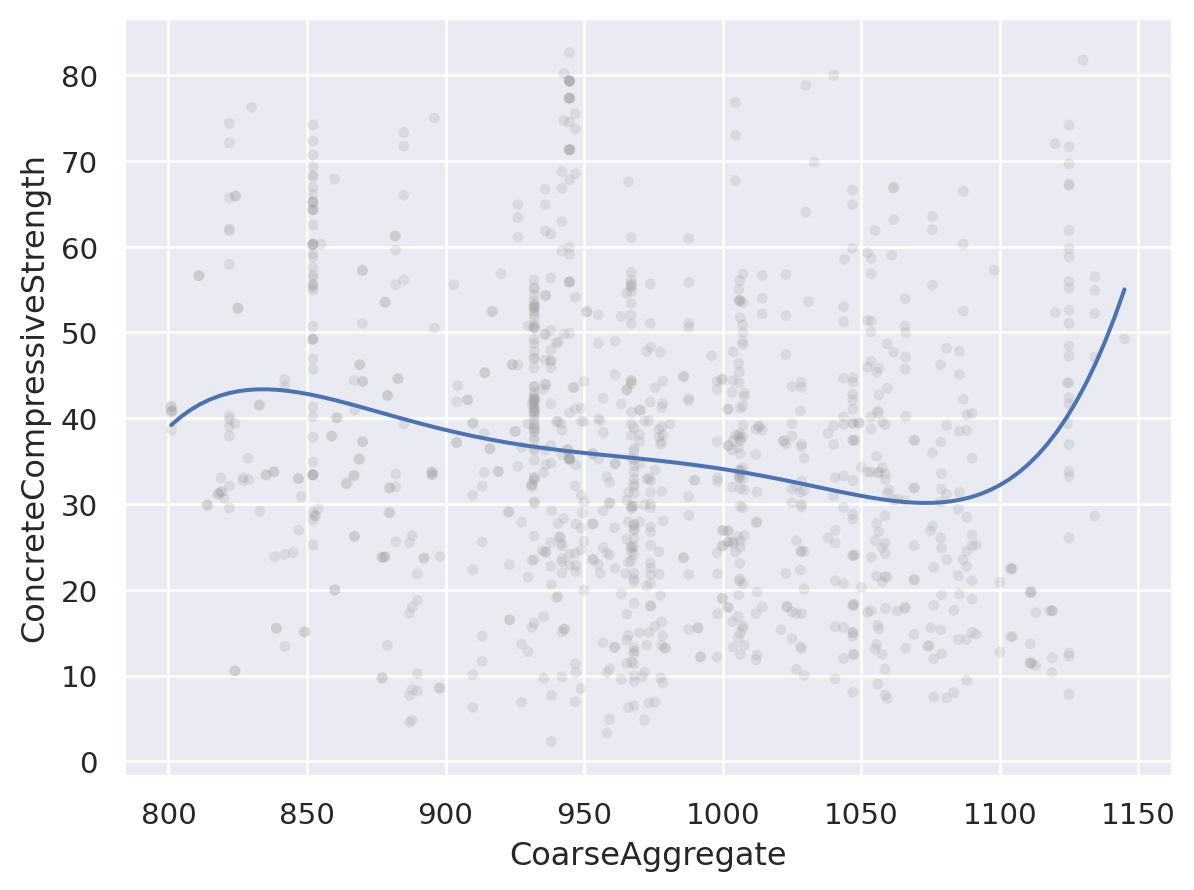

In [81]:
(
    so.Plot(concrete, x="CoarseAggregate", y="ConcreteCompressiveStrength")
    .add(so.Dots(alpha=1/100, color=".6"))
    .add(so.Line(), so.PolyFit(5))
)

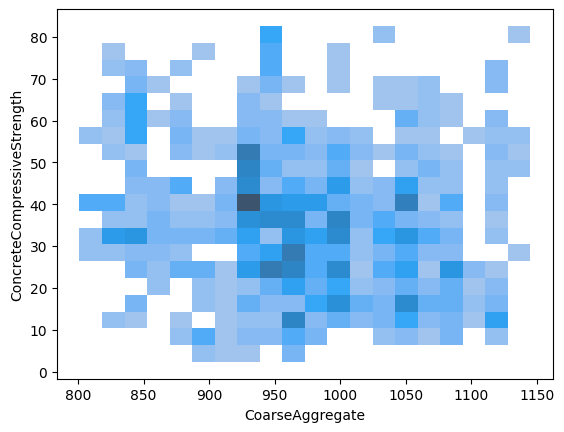

In [82]:
sns.histplot(concrete, x="CoarseAggregate", y="ConcreteCompressiveStrength", bins=20)
plt.show()

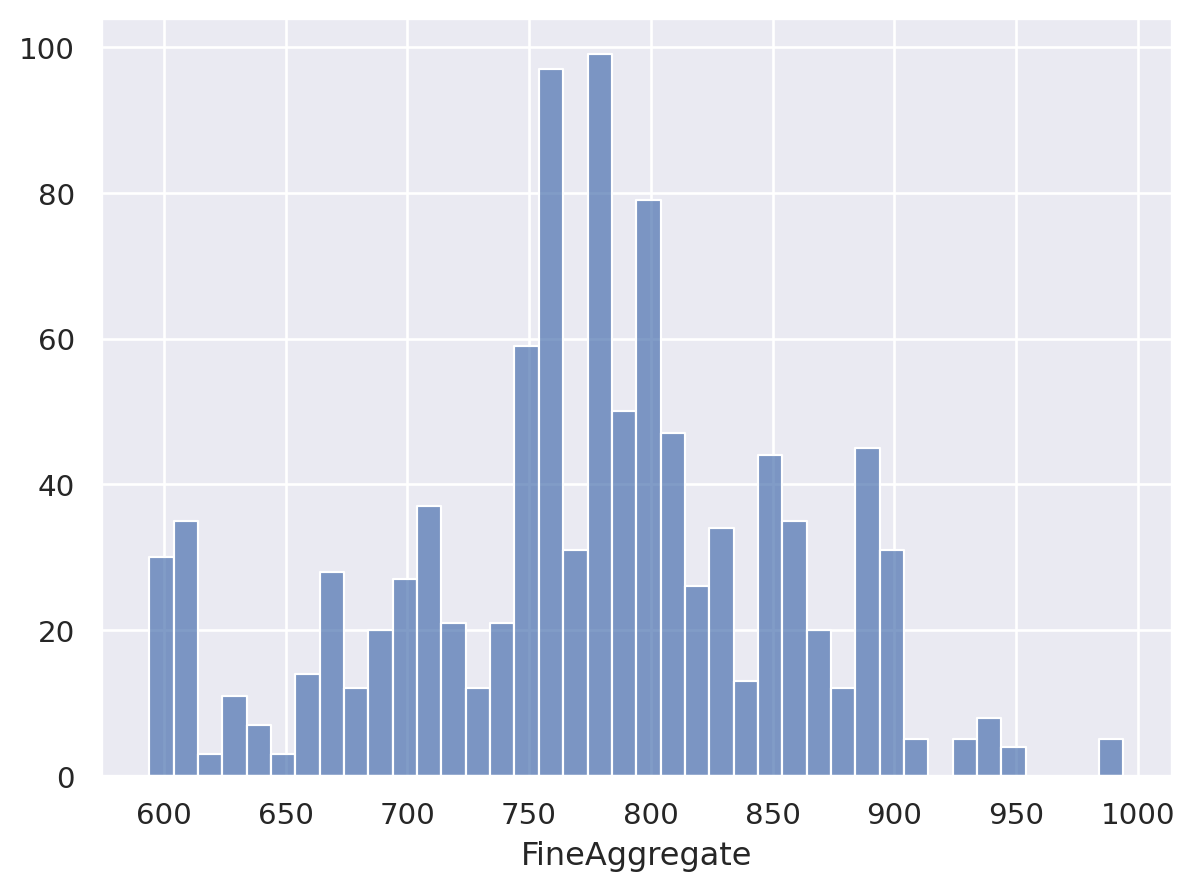

In [83]:
so.Plot(concrete, x="FineAggregate").add(so.Bars(), so.Hist(binwidth=10))

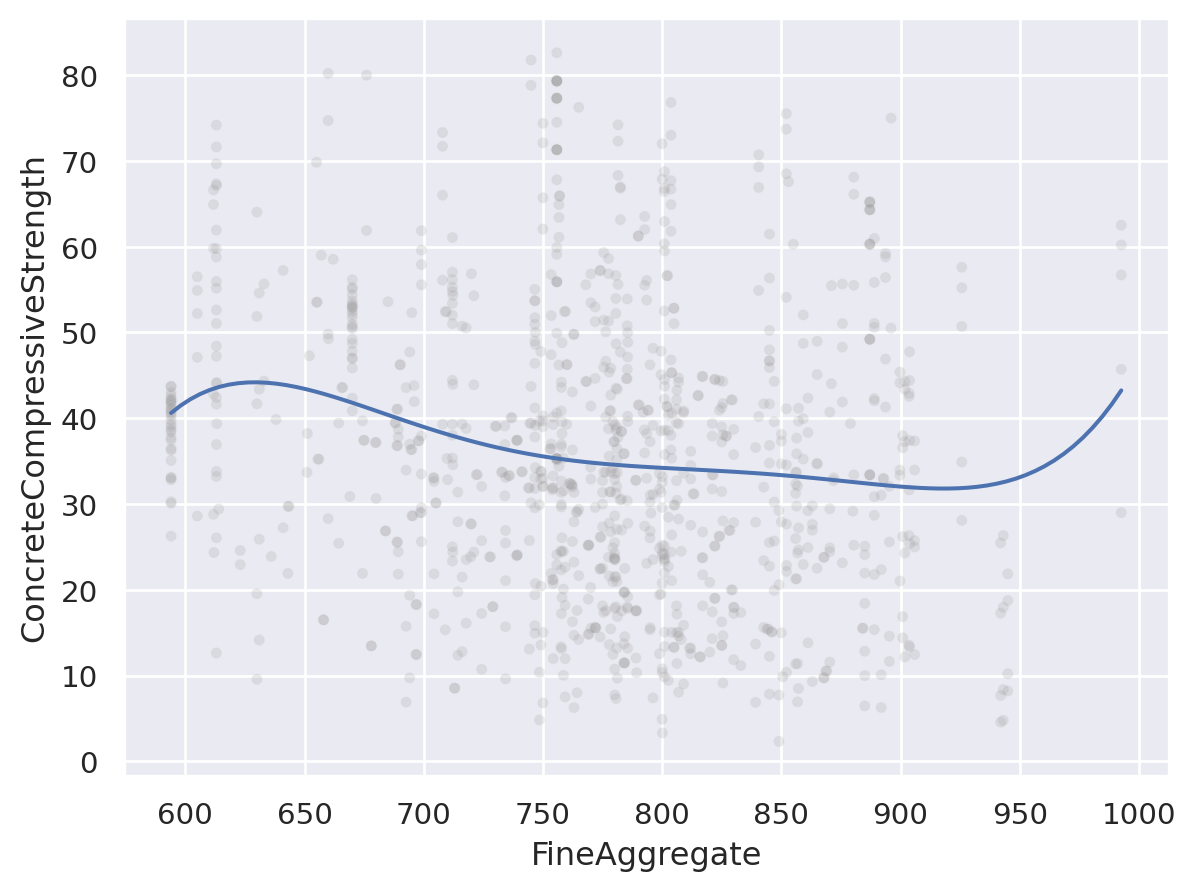

In [84]:
(
    so.Plot(concrete, x="FineAggregate", y="ConcreteCompressiveStrength")
    .add(so.Dots(alpha=1/100, color=".6"))
    .add(so.Line(), so.PolyFit(5))
)

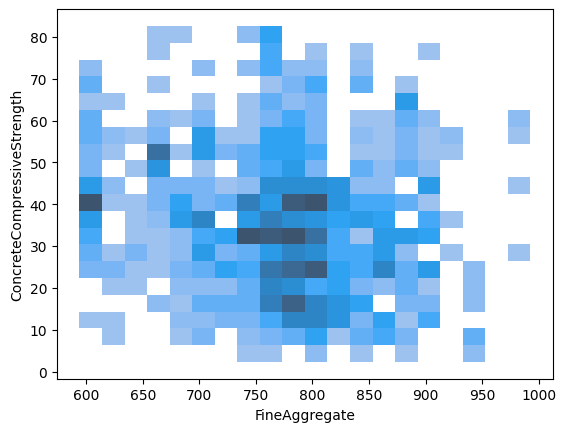

In [85]:
sns.histplot(concrete, x="FineAggregate", y="ConcreteCompressiveStrength", bins=20)
plt.show()

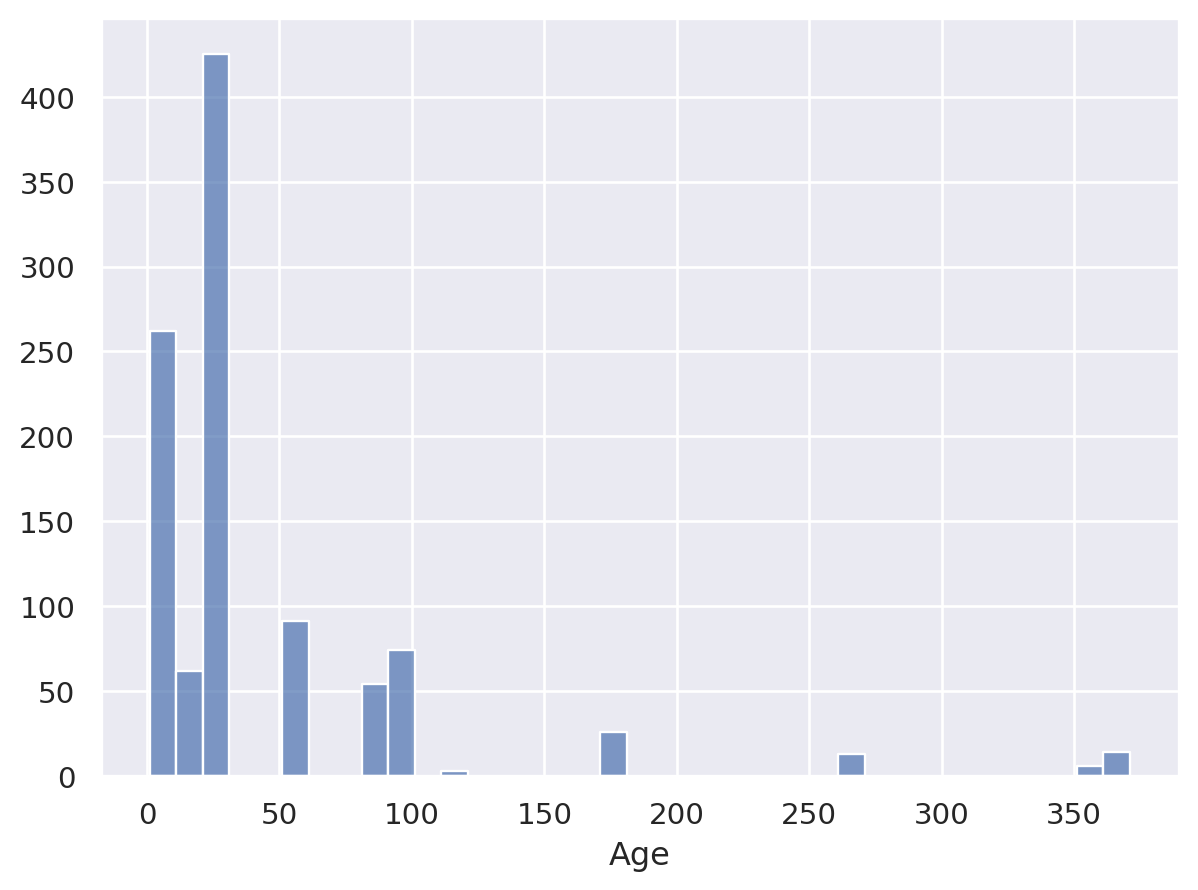

In [44]:
so.Plot(concrete, x="Age").add(so.Bars(), so.Hist(binwidth=10))

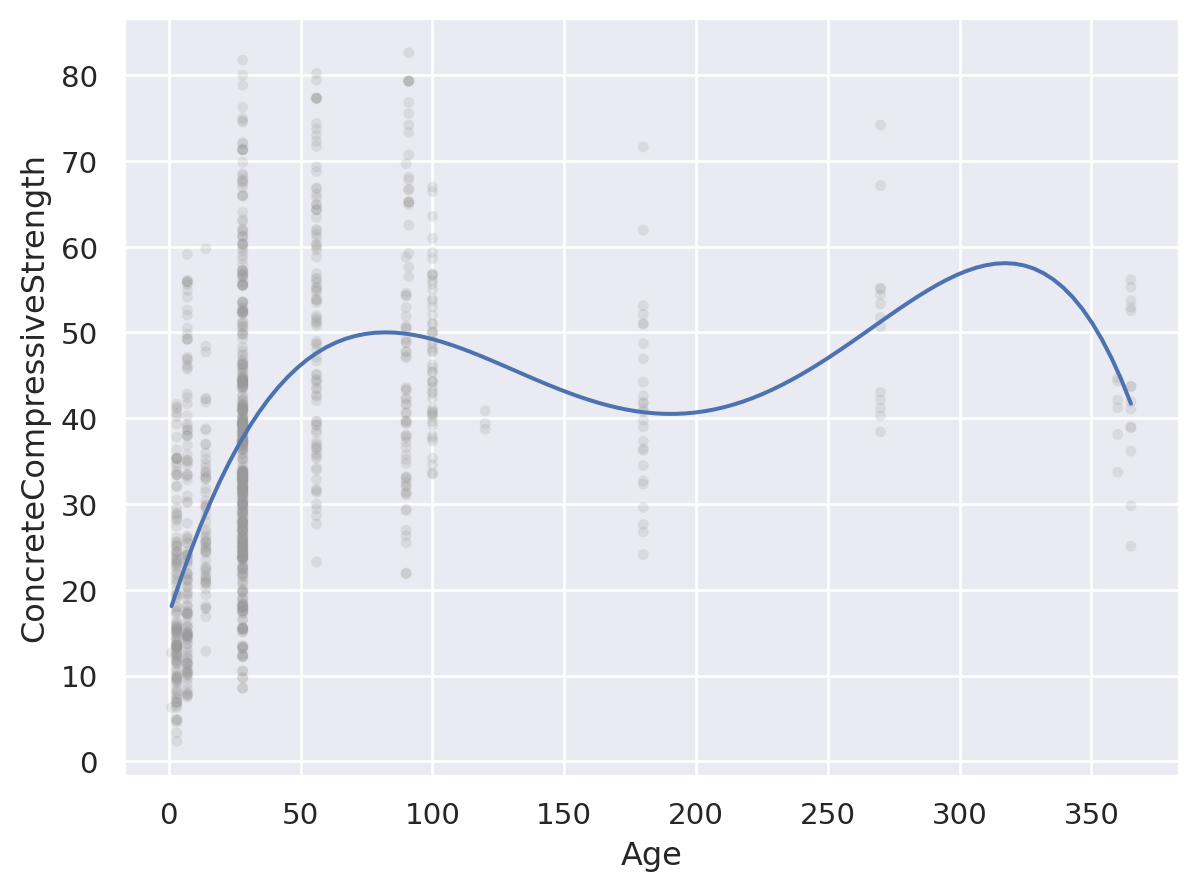

In [86]:
(
    so.Plot(concrete, x="Age", y="ConcreteCompressiveStrength")
    .add(so.Dots(alpha=1/100, color=".6"))
    .add(so.Line(), so.PolyFit(5))
)

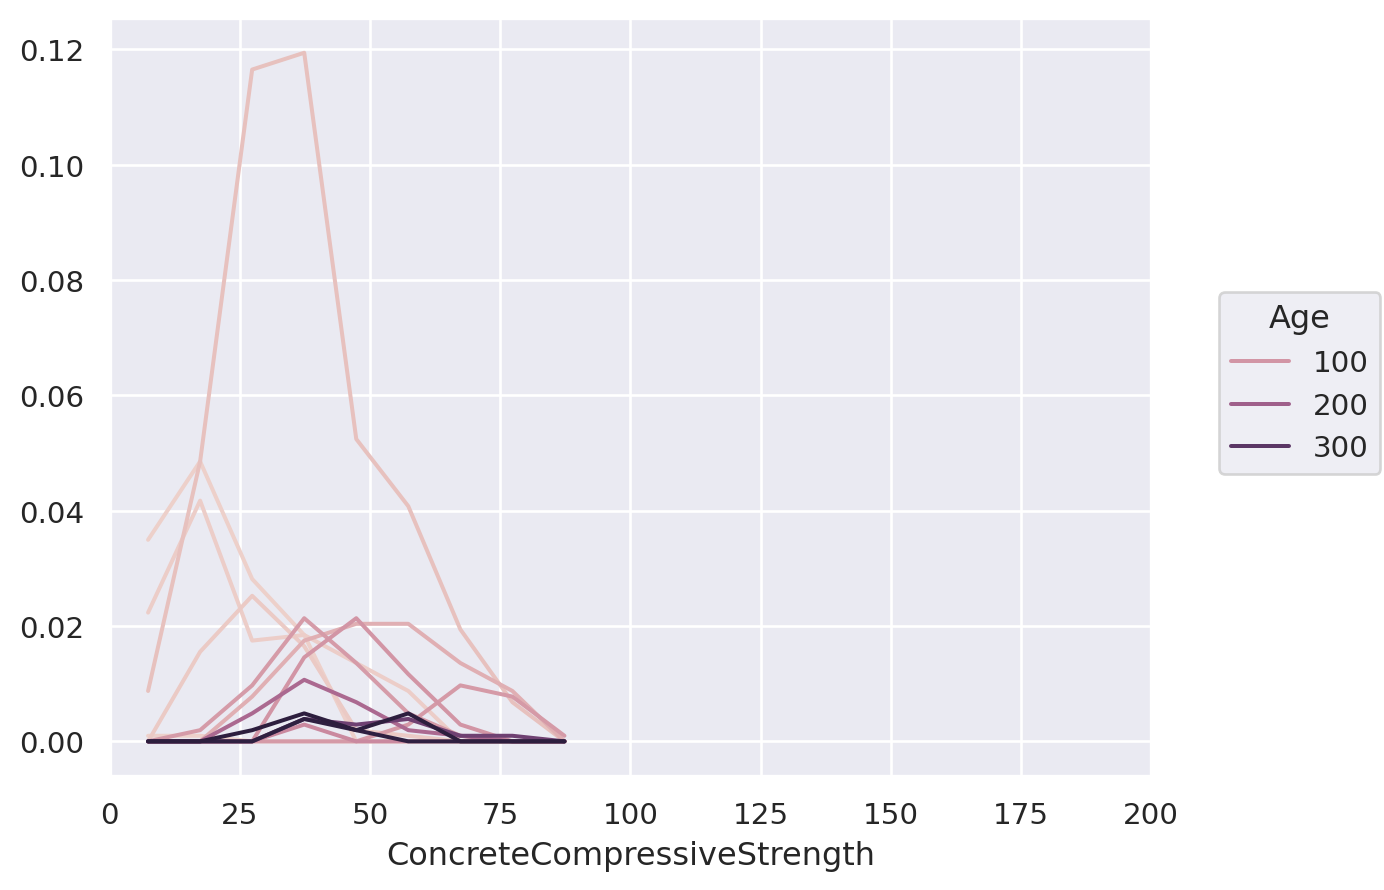

In [152]:
(
    so.Plot(concrete, x='ConcreteCompressiveStrength', color="Age")
    .add(so.Line(), so.Hist(stat="proportion", binwidth=10))
    .limit(x=(0, 200))
)

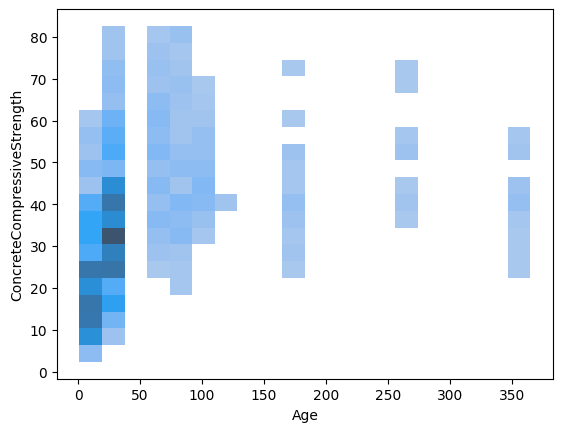

In [87]:
sns.histplot(concrete, x="Age", y="ConcreteCompressiveStrength", bins=20)
plt.show()

In [266]:
concrete_cat = concrete.assign(
    Age_cat=lambda x: pd.cut(x.Age, 20, labels=False, duplicates='drop'),
    Age_qcat=lambda x: pd.qcut(x.Age, 20, labels=False, duplicates='drop'),
)

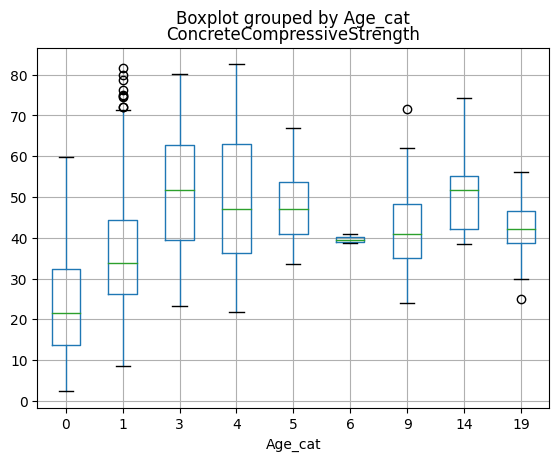

In [267]:
concrete_cat.boxplot("ConcreteCompressiveStrength", by="Age_cat")  # pandas boxplot
plt.show() # 생략

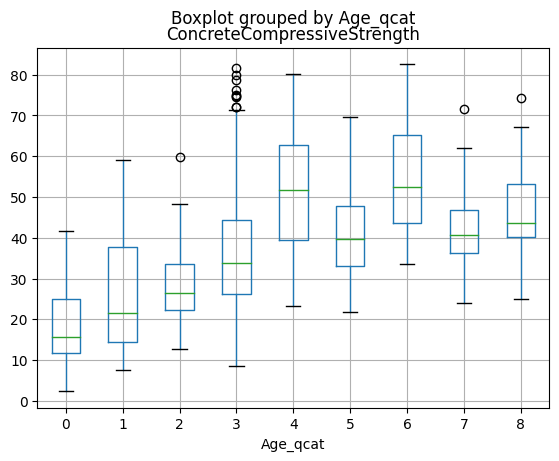

In [268]:
concrete_cat.boxplot("ConcreteCompressiveStrength", by="Age_qcat")  # pandas boxplot
plt.show() # 생략

In [232]:
import statsmodels.formula.api as smf

concrete2 = concrete.assign(
    lcement = np.log(concrete.Cement),
    lConcreteCompressiveStrength = np.log(concrete.ConcreteCompressiveStrength)
)

concrete_fit = smf.ols('lConcreteCompressiveStrength ~ lcement', data=concrete2).fit()

concrete2 = concrete2.assign(
    log_pred = concrete_fit.fittedvalues,
    log_resid = concrete_fit.resid,
    pred = lambda x: np.exp(x.log_pred),
    resid = lambda x: np.exp(x.log_resid),
    resid_diff = lambda x: x.ConcreteCompressiveStrength - x.pred
)


In [233]:
# show coefficients
print(concrete_fit.params)

# print R-squared
print(concrete_fit.rsquared)

Intercept   -0.41
lcement      0.69
dtype: float64
0.222830932760247


In [234]:
# import sklearn regression models
from sklearn.linear_model import LinearRegression

# create linear model where x is log_cement and y is log_ConcreteCompressiveStrength
lm = LinearRegression()
lm.fit(concrete2[["lcement"]], concrete2[["lConcreteCompressiveStrength"]])

LinearRegression()

In [235]:
# show coefficients
print(lm.coef_)

# print intercept
print(lm.intercept_)

# print R-squared
print(lm.score(concrete2[["lcement"]], concrete2[["lConcreteCompressiveStrength"]]))

[[0.69]]
[-0.41]
0.222830932760247


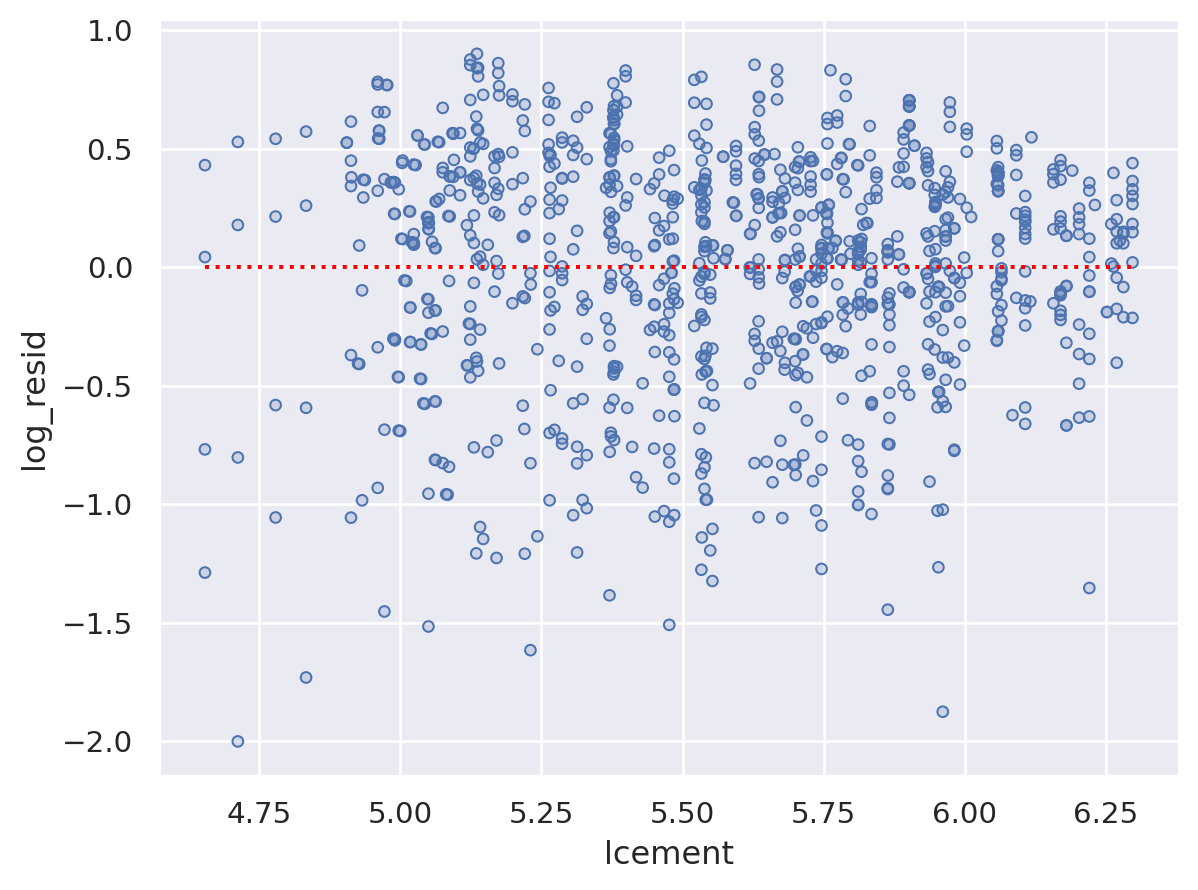

In [236]:
(
    so.Plot(concrete2, x='lcement', y='log_resid')
    .add(so.Dots())
    .add(so.Line(linestyle=":", color="red"), so.Agg(lambda x: 0))
)

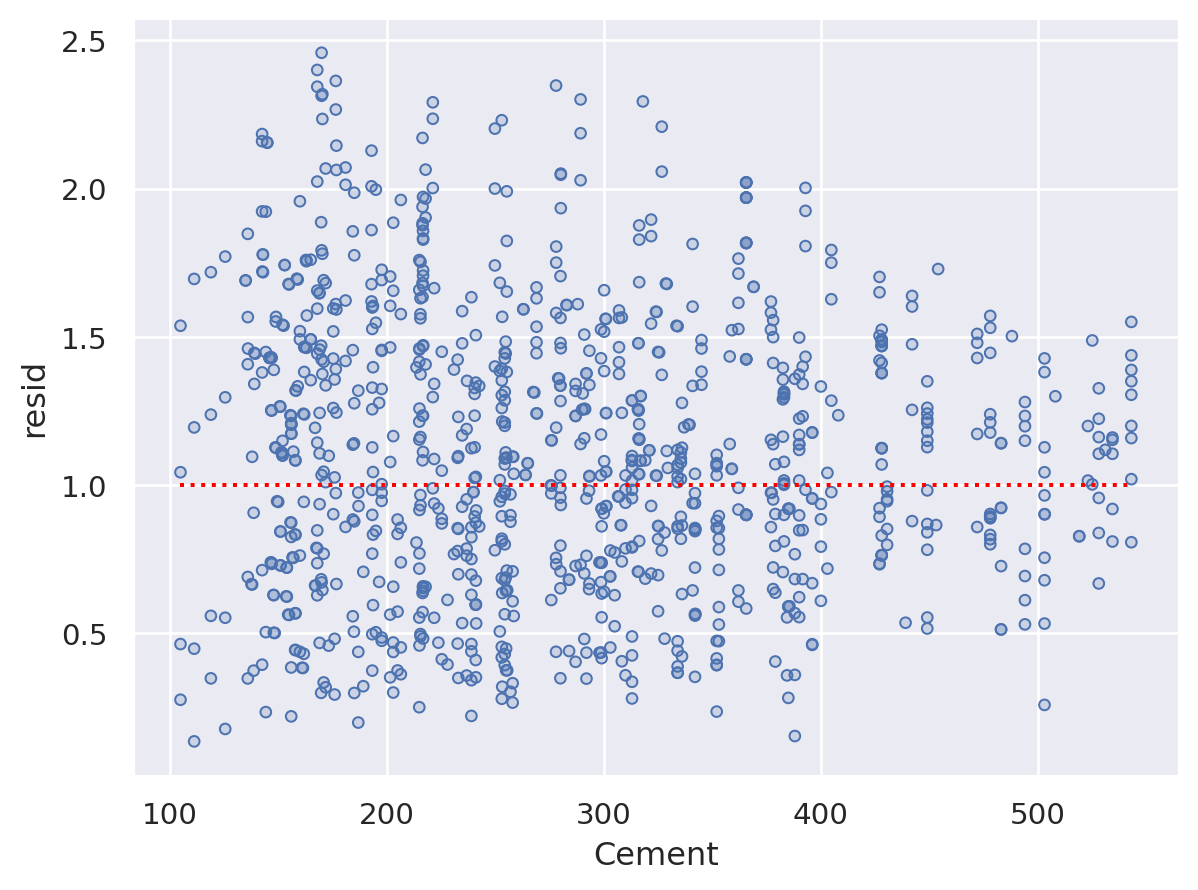

In [237]:
(
    so.Plot(concrete2, x='Cement', y='resid')
    .add(so.Dots())
    .add(so.Line(linestyle=":", color="red"), so.Agg(lambda x: 1))
)

잔차에 패턴이 보이지 않음
좋은 예측이 가능 할 것으로 보임

다만 분산이 크게 나타남 따라서 모집단에 대한 추론을 어렵게 함.

In [238]:
concrete2 = concrete.assign(
    lConcreteCompressiveStrength=lambda x: np.log2(x.ConcreteCompressiveStrength),
    lcement=lambda x: np.log2(x.Cement)
)

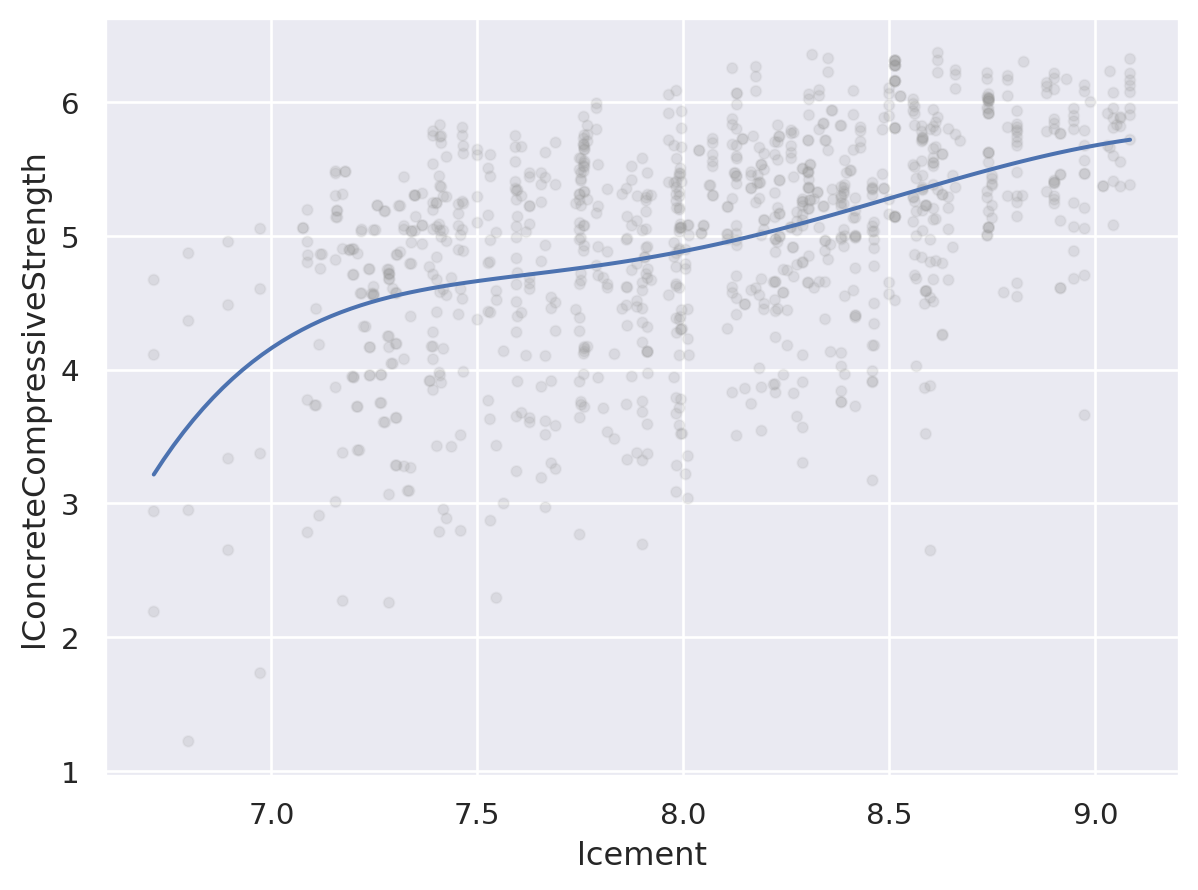

In [239]:
(
    so.Plot(concrete2, x='lcement', y='lConcreteCompressiveStrength')
    .add(so.Dots(color=".6", alpha=.1))
    .add(so.Line(), so.PolyFit(5))
)

In [240]:
# 시멘트로 강도을 예측하는 선형모형
from statsmodels.formula.api import ols
mod_concrete = ols("lConcreteCompressiveStrength ~ lcement", data=concrete2).fit()

In [241]:
mod_concrete.params

Intercept   -0.59
lcement      0.69
dtype: float64

In [242]:
grid = pd.DataFrame({"Cement": []})
grid["Cement"]= np.linspace(concrete2.Cement.min(), concrete2.Cement.max(), 20)
grid = grid.assign(
    lcement=lambda x: np.log2(x.Cement),
    lConcreteCompressiveStrength=lambda x: mod_concrete.predict(x.lcement),
    ConcreteCompressiveStrength=lambda x: 2**x.lConcreteCompressiveStrength
)

In [243]:
grid

Cement  lcement  lConcreteCompressiveStrength  ConcreteCompressiveStrength
0   105.00     6.71                          4.05                        16.56
1   128.05     7.00                          4.25                        19.00
2   151.11     7.24                          4.41                        21.30
3   174.16     7.44                          4.55                        23.50
..     ...      ...                           ...                          ...
16  473.84     8.89                          5.55                        46.96
17  496.89     8.96                          5.60                        48.52
18  519.95     9.02                          5.65                        50.07
19  543.00     9.08                          5.69                        51.59

[20 rows x 4 columns]

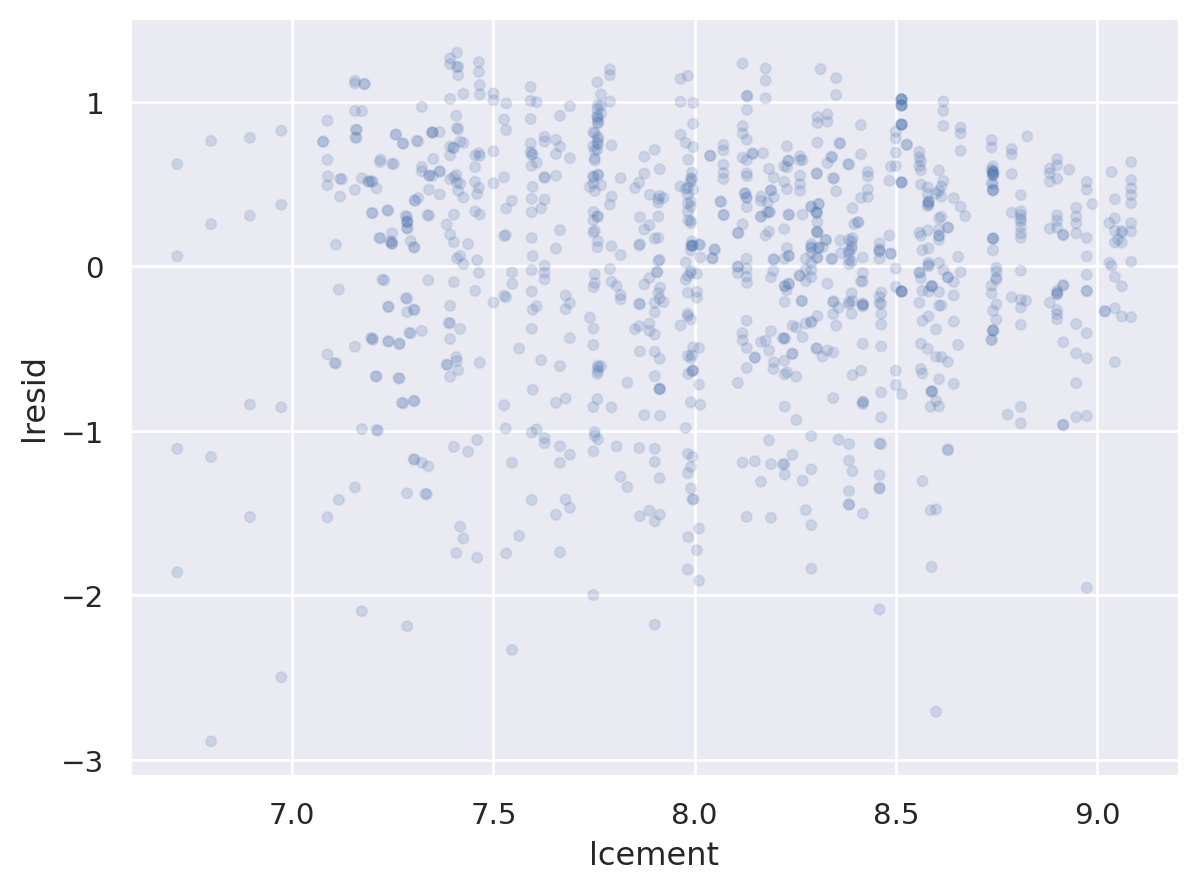

In [244]:
concrete2["lresid"] = mod_concrete.resid

(
    so.Plot(concrete2, x='lcement', y='lresid')
    .add(so.Dots(alpha=.1))
)

residual +1은 시멘트만으로 예측되는 강도(residual = 0)보다 강도가 2배 높다다는 것을 의미

residual -1은 시멘트으로 예측되는 강도(residual = 0)보다 강도가 1/2배 낮다는 것을 의미


In [245]:
Superplasticizer = rangeplot(concrete2, x="Superplasticizer", y="lresid")
Age = rangeplot(concrete2, x="Age", y="lresid")
Water = rangeplot(concrete2, x="Water", y="lresid")

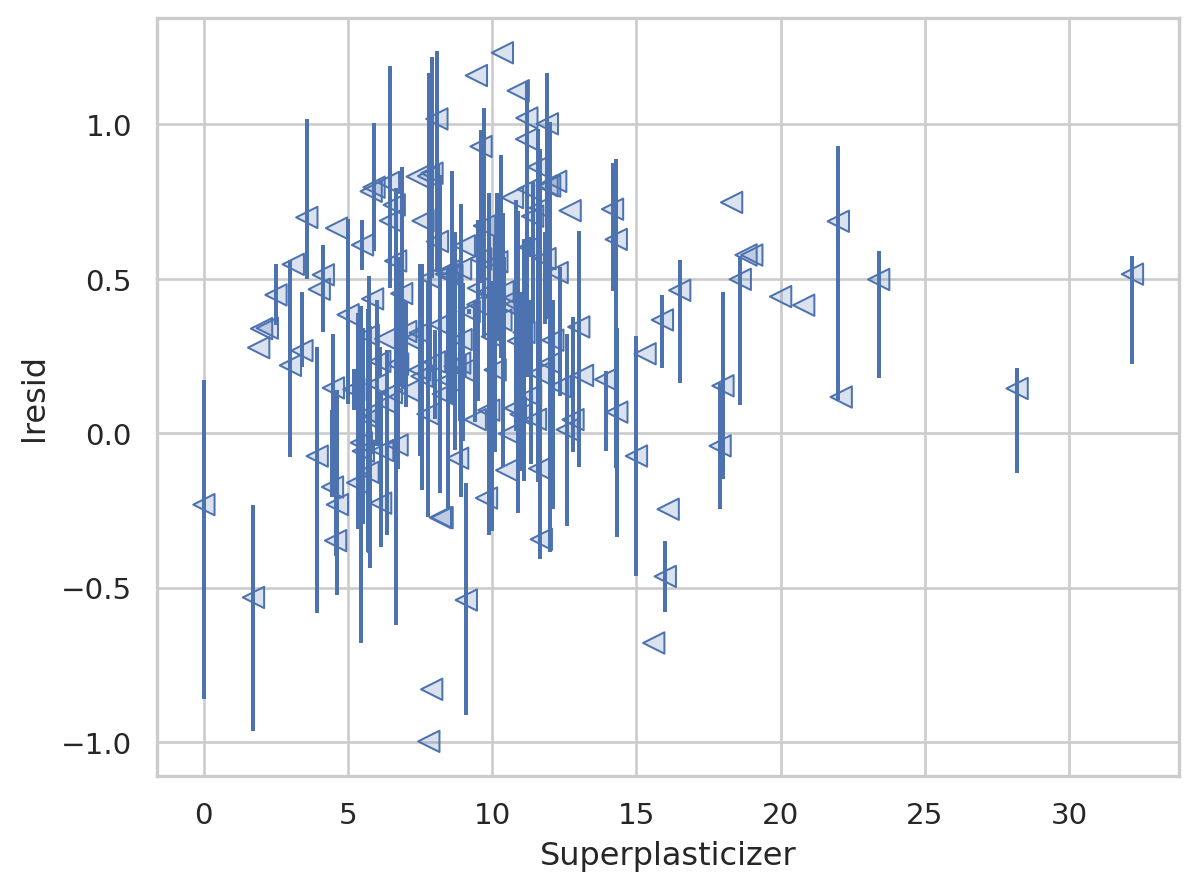

In [246]:
Superplasticizer

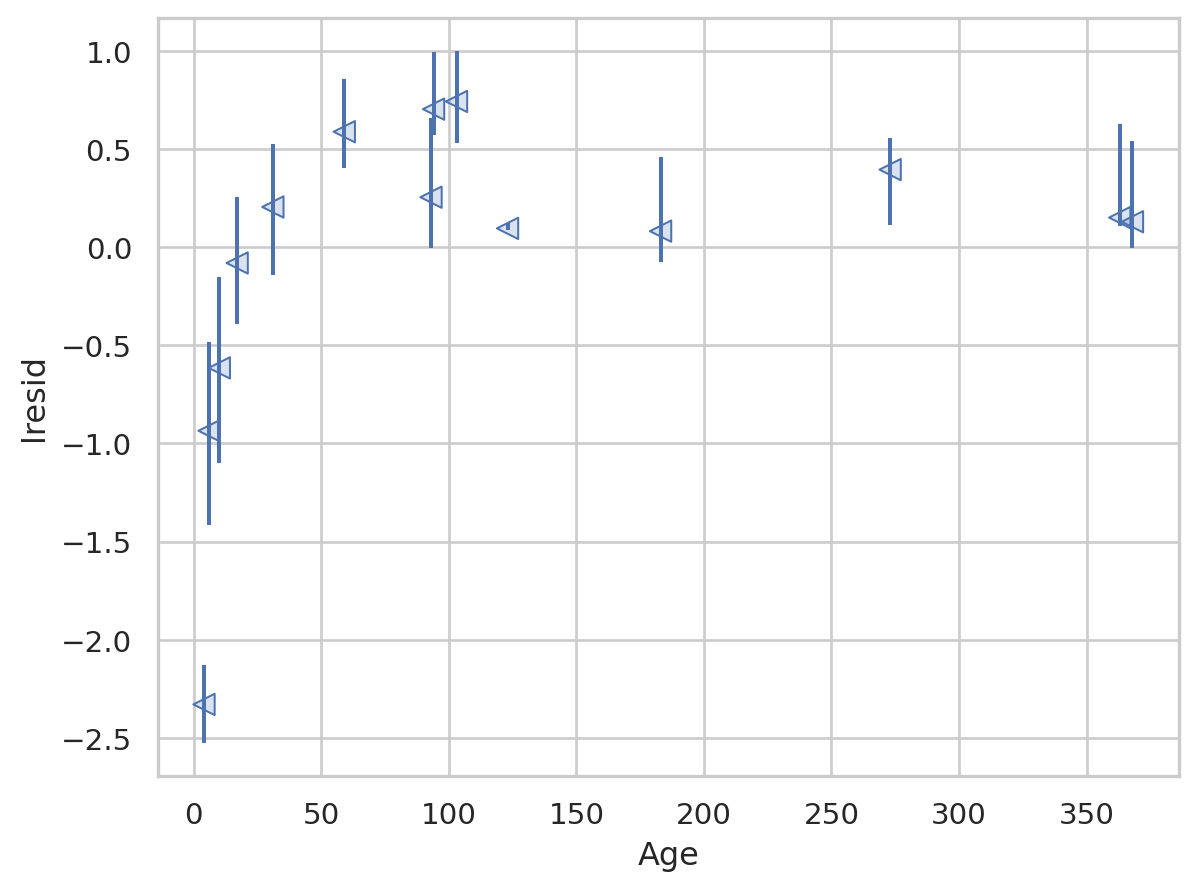

In [247]:
Age

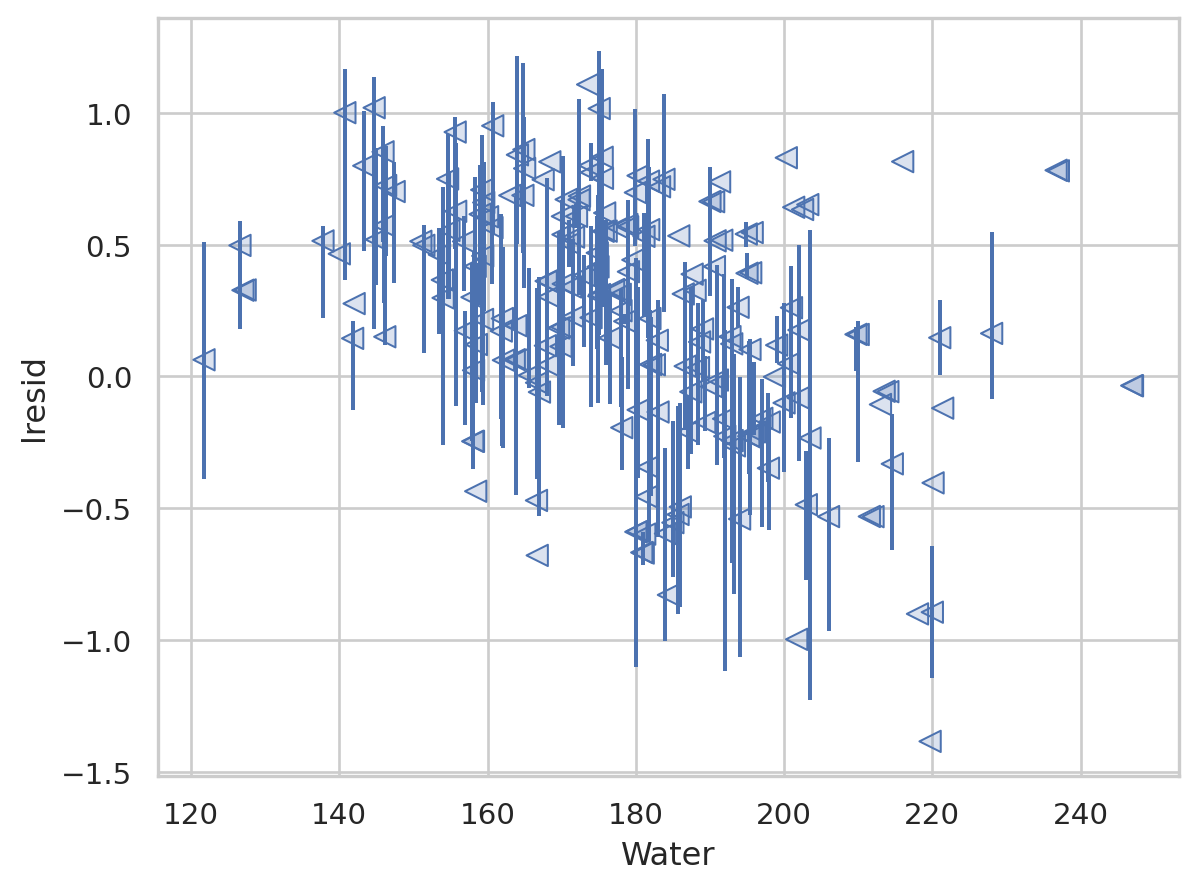

In [248]:
Water

In [249]:
concrete2_mod1 = ols("lConcreteCompressiveStrength ~ lcement + Superplasticizer", data=concrete2).fit()
concrete2_mod2 = ols("lConcreteCompressiveStrength ~ lcement + Age", data=concrete2).fit()
concrete2_mod3 = ols("lConcreteCompressiveStrength ~ lcement + Water", data=concrete2).fit()
mod_full = ols("lConcreteCompressiveStrength ~ lcement + Superplasticizer + Age + Water", data=concrete2).fit()
print(concrete2_mod1.params)
print(concrete2_mod2.params)
print(concrete2_mod3.params)
print(mod_full.params)

Intercept          -0.54
lcement             0.65
Superplasticizer    0.04
dtype: float64
Intercept   -0.46
lcement      0.65
Age          0.00
dtype: float64
Intercept    0.99
lcement      0.67
Water       -0.01
dtype: float64
Intercept           0.58
lcement             0.59
Superplasticizer    0.04
Age                 0.01
Water              -0.00
dtype: float64


In [250]:
concrete2["lresid_full"] = mod_full.resid

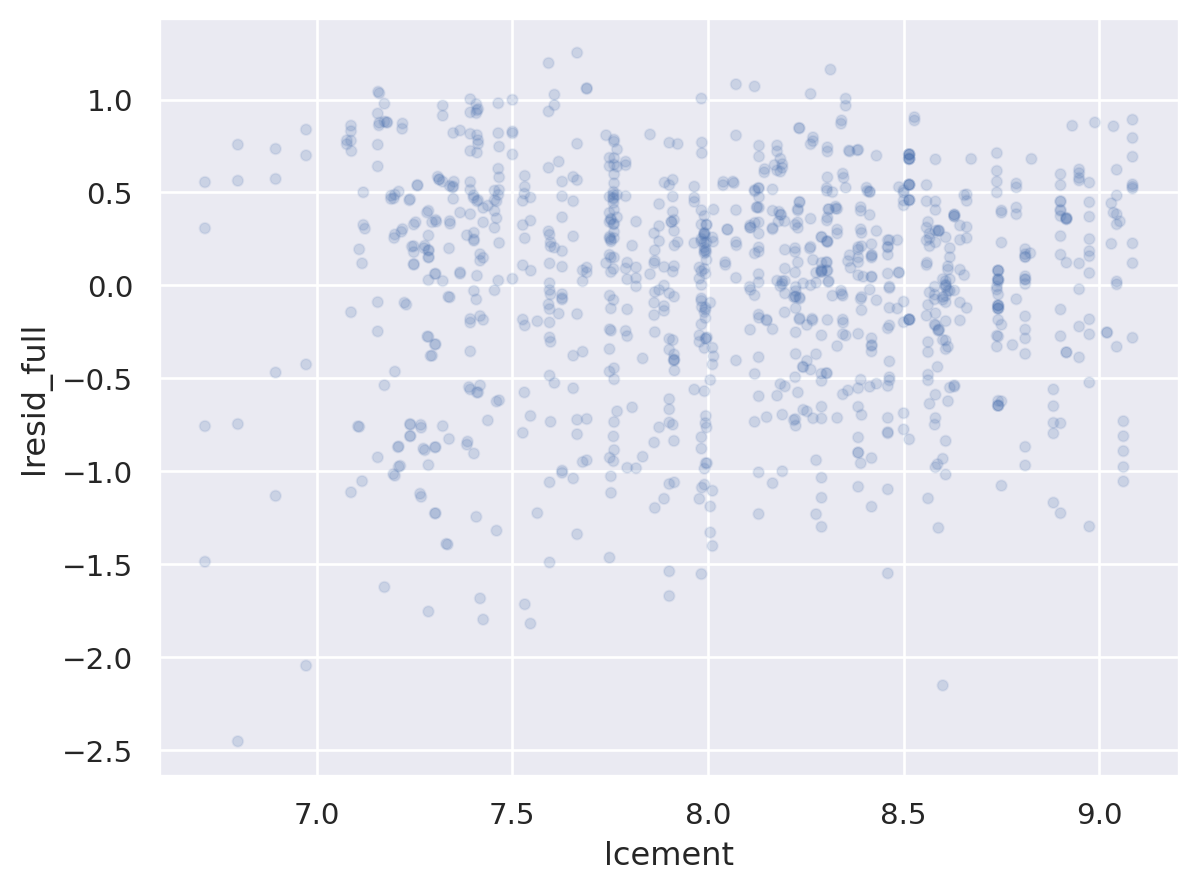

In [251]:
(
    so.Plot(concrete2, x='lcement', y='lresid_full')
    .add(so.Dots(alpha=.1))
)

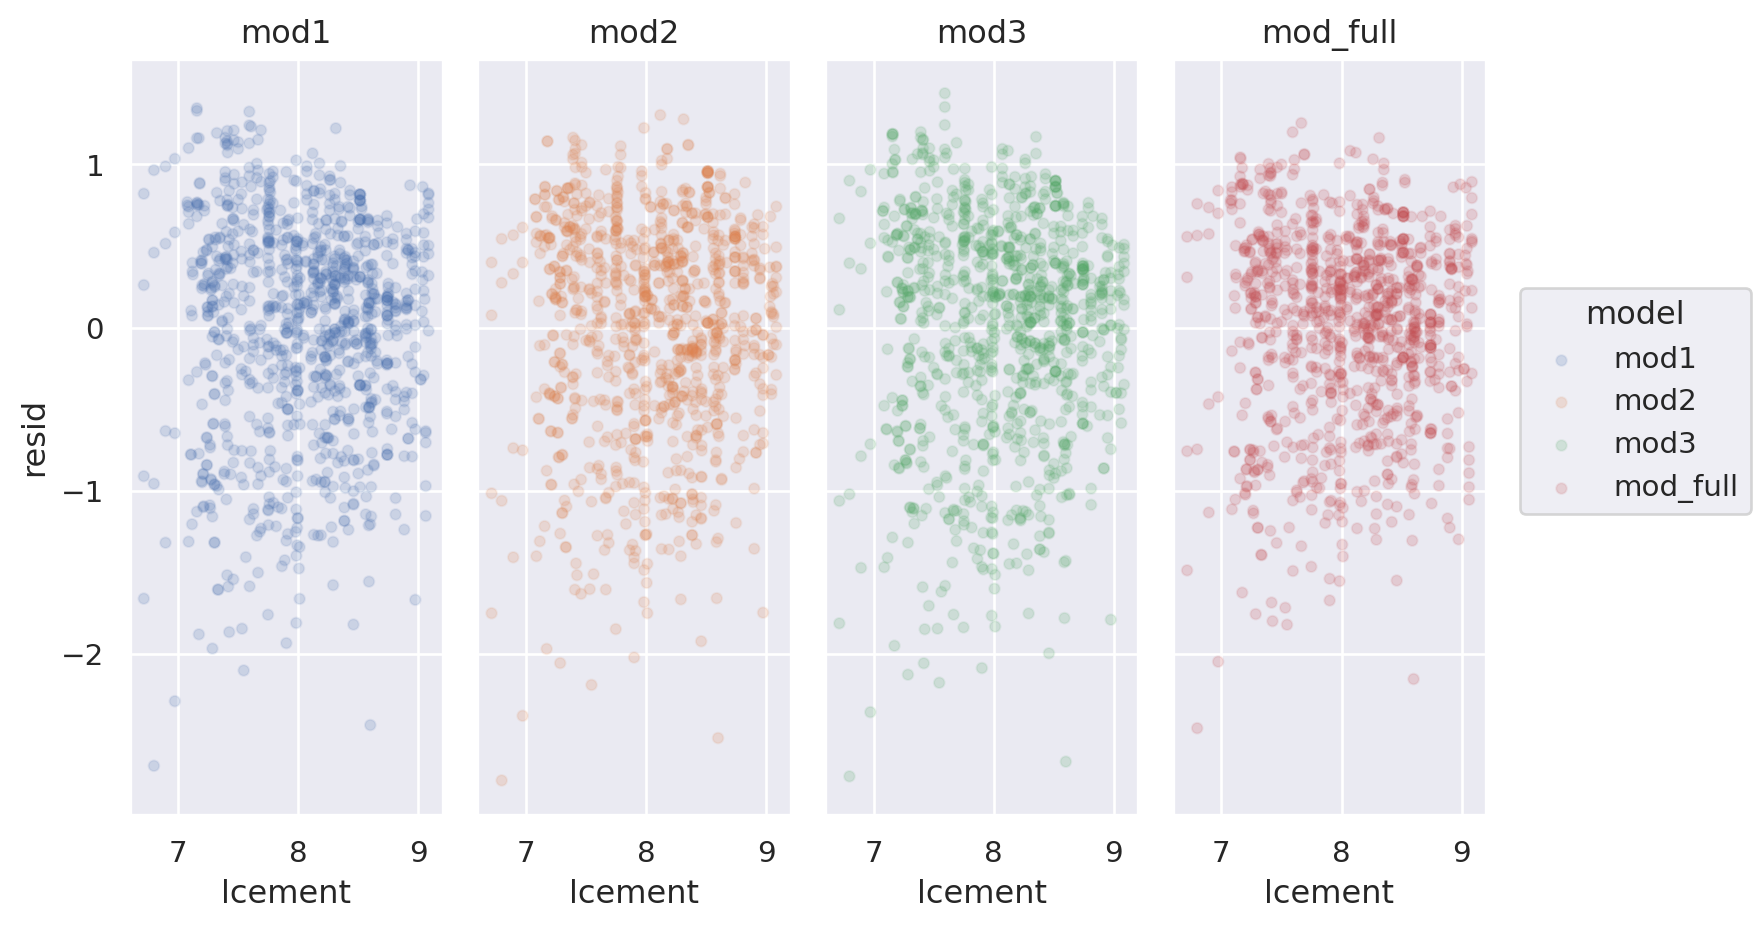

In [252]:
concrete2_mods = concrete2.assign(
    mod1=concrete2_mod1.resid,
    mod2=concrete2_mod2.resid,
    mod3=concrete2_mod3.resid,
    mod_full=mod_full.resid,
)

concrete2_mods = concrete2_mods.melt(
    id_vars=["lcement", "lConcreteCompressiveStrength"],
    value_vars=["mod1", "mod2", "mod3","mod_full"],
    var_name="model",
    value_name="resid",
)

(
    so.Plot(concrete2_mods, x='lcement', y='resid', color='model')
    .add(so.Dots(alpha=.1))
    .facet("model")
    .layout(size=(8, 5))
)

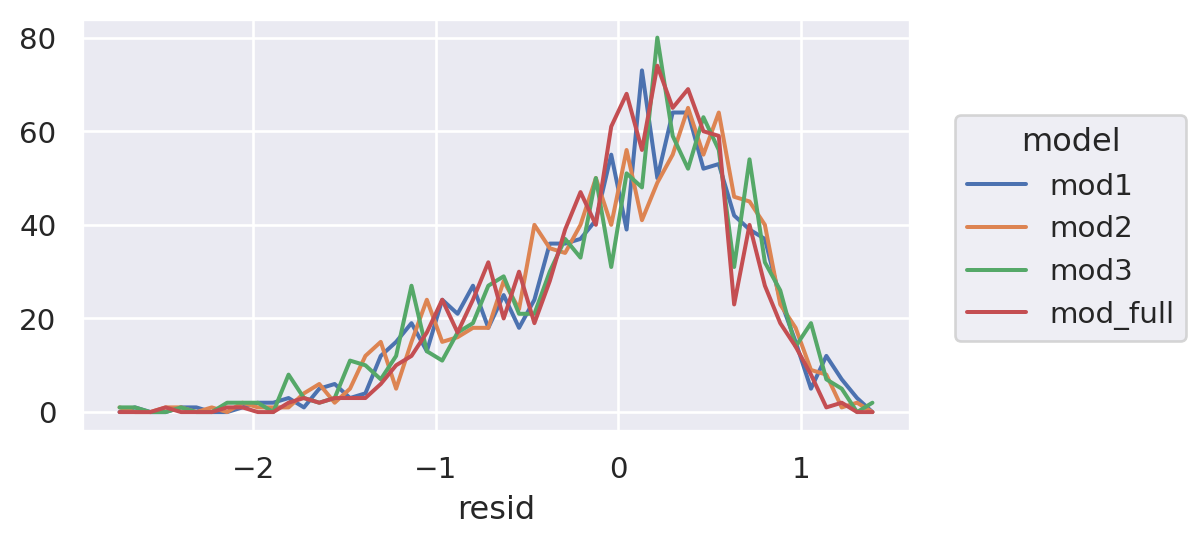

In [253]:
(
    so.Plot(concrete2_mods, x='resid', color='model')
    .add(so.Line(), so.Hist(bins=50))
    .layout(size=(5, 3))
)

standard deviation모형을 따르는 것 같음

In [254]:
from statsmodels.tools.eval_measures import rmse, meanabs

mods = [concrete2_mod1, concrete2_mod2, concrete2_mod3, mod_full]
y = concrete2.ConcreteCompressiveStrength
print("The prediction accuracy of the models (original unit except R-squared):\n")

for mod in mods:
    y_hat = 2**mod.fittedvalues
    R2 = mod.rsquared

    print(
        f"R-squared: {R2:.2f}, RMSE: {rmse(y, y_hat):.2f}, "
        f"MAE:{meanabs(y, y_hat):.2f}"
    )

The prediction accuracy of the models (original unit except R-squared):

R-squared: 0.31, RMSE: 14.23, MAE:11.44
R-squared: 0.31, RMSE: 15.12, MAE:11.91
R-squared: 0.26, RMSE: 14.12, MAE:11.59
R-squared: 0.46, RMSE: 13.79, MAE:10.48


In [255]:
concrete2_mod2 = ols("lConcreteCompressiveStrength ~ lcement + Superplasticizer + Age", data=concrete2).fit()
concrete2_mod2_interact = ols("lConcreteCompressiveStrength ~ lcement * Superplasticizer * Age", data=concrete2).fit()

In [256]:
concrete2_mod2 = ols("lConcreteCompressiveStrength ~ lcement + Superplasticizer + Age", data=concrete2).fit()
concrete2_mod2_interact = ols("lConcreteCompressiveStrength ~ lcement * Superplasticizer * Age", data=concrete2).fit()

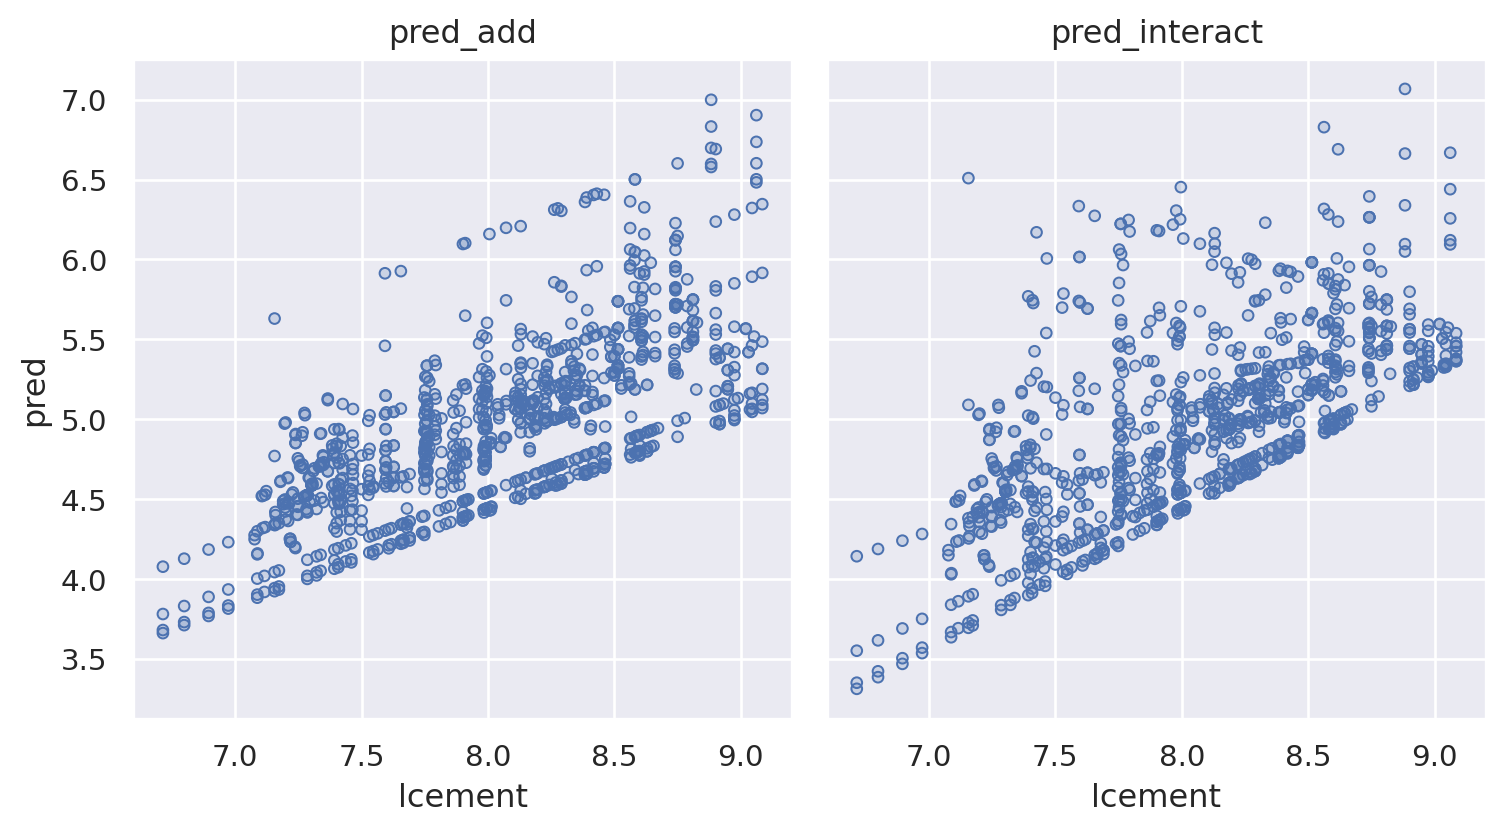

In [257]:
concrete2_mods = concrete2.assign(
    pred_add=concrete2_mod2.fittedvalues,
    pred_interact=concrete2_mod2_interact.fittedvalues,
)

concrete2_mods = concrete2_mods.melt(
    id_vars=["lcement", "lConcreteCompressiveStrength",  "Superplasticizer", "Age"],
    value_vars=["pred_add", "pred_interact"],
    var_name="model",
    value_name="pred",
)

(
    so.Plot(concrete2_mods, x='lcement', y='pred')
    .add(so.Dots())
    .facet("model")
    .layout(size=(8, 4.5))
)

<Axes: title={'center': 'Age vs. Strength'}, xlabel='Age', ylabel='ConcreteCompressiveStrength'>

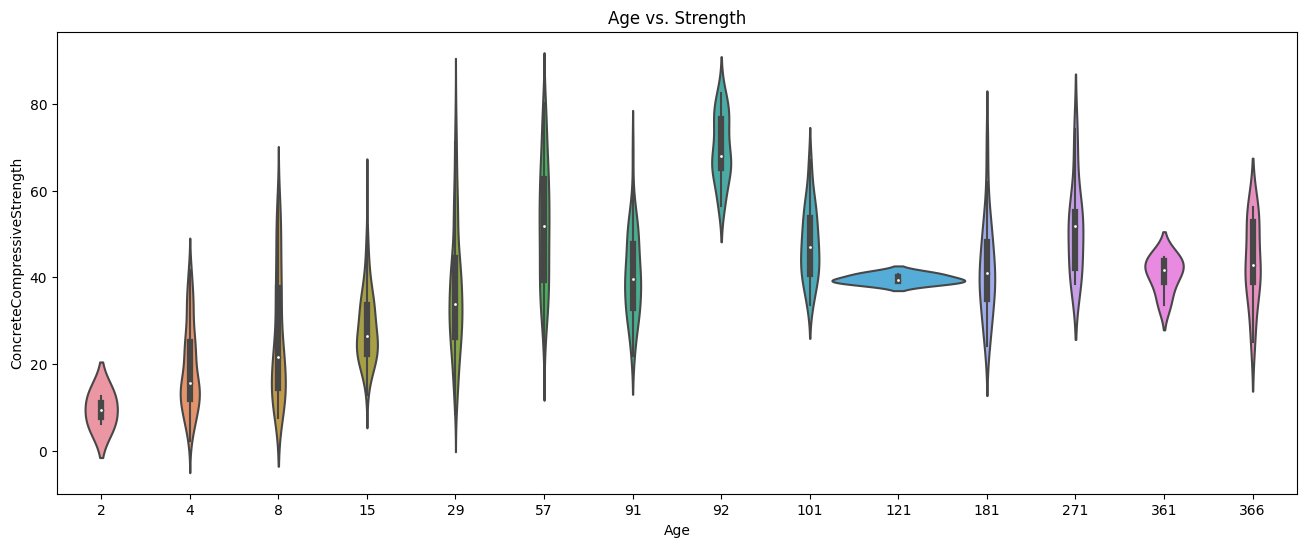

In [170]:
plt.figure(figsize=(16, 6), label='Age vs. Strength')
plt.title('Age vs. Strength')
sns.violinplot(data=df, x="Age", y="ConcreteCompressiveStrength", width=1.5, )

주어진 그래프는 나이와 힘 간의 양의 상관관계를 뚜렷하게 보여줍니다. 그리고 약 100일 이후에는 상관관계가 일정해지거나 더 이상 크게 증가하지 않는 것으로 보입니다.

In [167]:
# Creating a column for cement/water ratio
df['cement_water_ratio'] = df['Cement']/df['Water']

# Determine the Pearson Correlation between C/W ratio and strength
import scipy.stats
correlation = scipy.stats.pearsonr(df['cement_water_ratio'],df['ConcreteCompressiveStrength'])[0]
print('The correlation between C/W Ratio and Strength is {}'.format(correlation))

The correlation between C/W Ratio and Strength is 0.5596116839314497


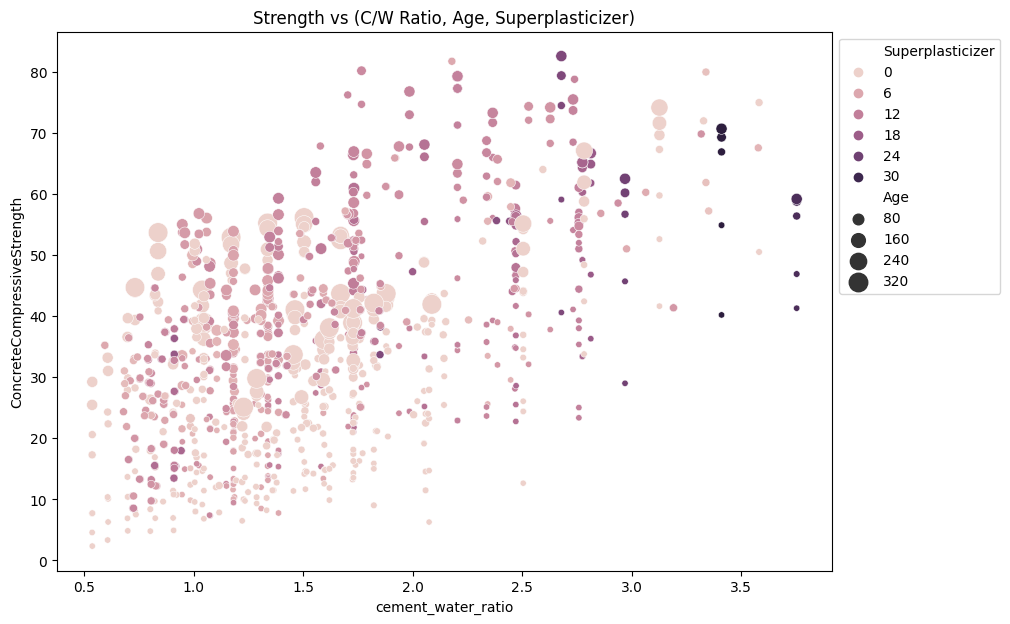

In [168]:
# This plot represents our three strongest independent correlations with strength

fig, ax = plt.subplots(figsize=(10,7))
sns.scatterplot(y="ConcreteCompressiveStrength", x="cement_water_ratio", hue="Superplasticizer", size="Age", data=df, ax=ax, sizes=(20, 200))
ax.set_title("Strength vs (C/W Ratio, Age, Superplasticizer)")
ax.legend(loc="upper left", bbox_to_anchor=(1,1))
plt.show()

주어진 정보에 따르면, C/W 비율은 힘과 가장 강한 상관관계를 갖는 변수입니다.

In [194]:
# 열 순서 변경
columns = df.columns.tolist()  # 열 이름을 리스트로 변환
columns[-1], columns[-2] = columns[-2], columns[-1]  # -1번째와 -2번째 열 순서 변경
df = df.reindex(columns=columns)  # 데이터프레임 업데이트
concrete = df

In [259]:
df.describe()

Cement  BlastFurnaceSlag  FlyAsh   Water  Superplasticizer  \
count 1030.00           1030.00 1030.00 1030.00           1030.00   
mean   284.17             73.90   54.19  181.57              6.20   
std    104.51             86.28   64.00   21.36              5.97   
min    105.00              0.00    0.00  121.75              0.00   
25%    195.38              0.00    0.00  164.90              0.00   
50%    275.90             22.00    0.00  185.00              6.35   
75%    353.00            142.95  118.27  192.00             10.16   
max    543.00            359.40  200.10  247.00             32.20   

       CoarseAggregate  FineAggregate     Age  cement_water_ratio  \
count          1030.00        1030.00 1030.00             1030.00   
mean            972.92         773.58   48.66                1.58   
std              77.75          80.18   63.17                0.65   
min             801.00         594.00    4.00                0.54   
25%             932.00         730.95   10.00                1.08   
50%             968.00         779.51   31.00                1.49   
75%            1029.40         824.00   59.00                1.88   
max            1145.00         992.60  368.00                3.75   

       ConcreteCompressiveStrength  
count                      1030.00  
mean                         35.82  
std                          16.71  
min                           2.33  
25%                          23.71  
50%                          34.44  
75%                          46.14  
max                          82.60

In [196]:
concrete2 = concrete.assign(
    lConcreteCompressiveStrength=lambda x: np.log2(x.ConcreteCompressiveStrength),
)

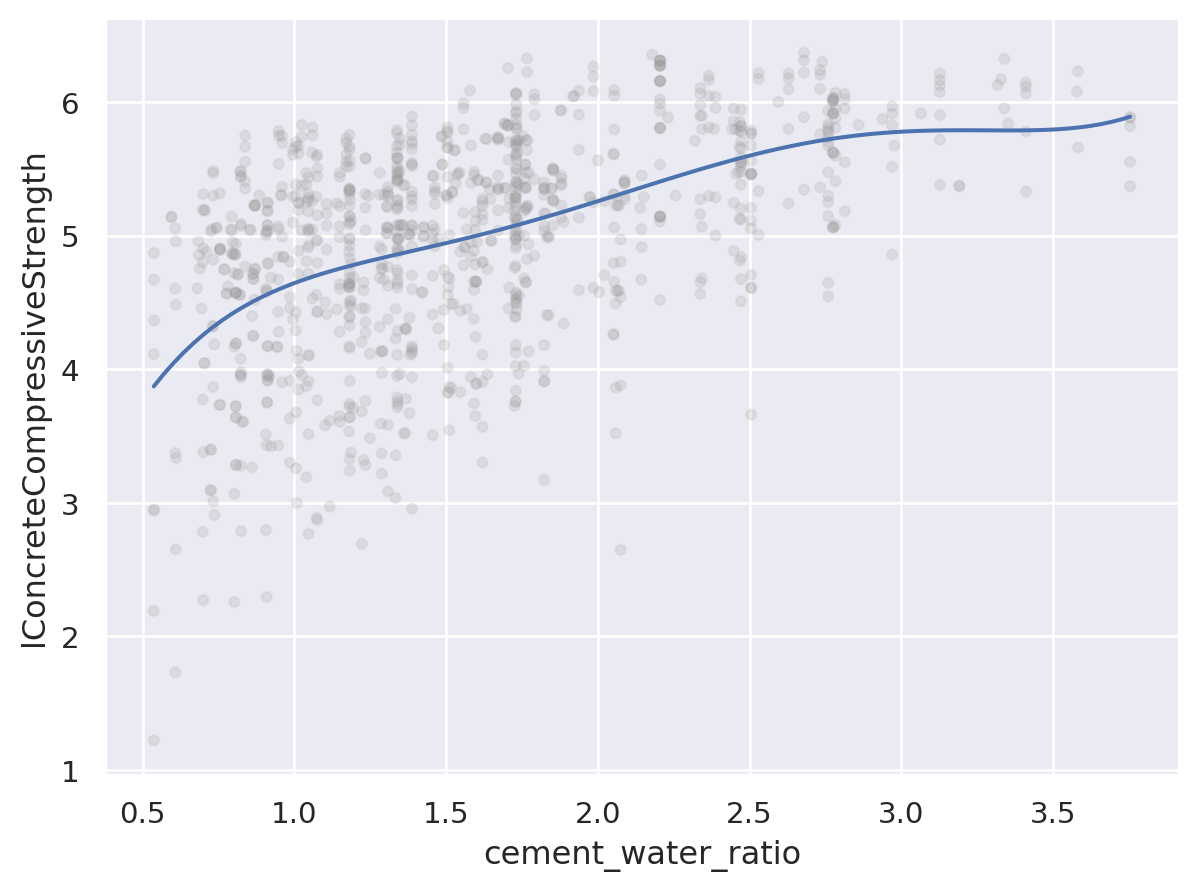

In [198]:
(
    so.Plot(concrete2, x='cement_water_ratio', y='lConcreteCompressiveStrength')
    .add(so.Dots(color=".6", alpha=.1))
    .add(so.Line(), so.PolyFit(5))
)

In [216]:
import statsmodels.formula.api as smf

concrete2 = concrete.assign(
    lConcreteCompressiveStrength = np.log(concrete.ConcreteCompressiveStrength)
)

concrete_fit = smf.ols('lConcreteCompressiveStrength ~ cement_water_ratio', data=concrete2).fit()

concrete2 = concrete2.assign(
    log_pred = concrete_fit.fittedvalues,
    log_resid = concrete_fit.resid,
    pred = lambda x: np.exp(x.log_pred),
    resid = lambda x: np.exp(x.log_resid),
    resid_diff = lambda x: x.lConcreteCompressiveStrength - x.pred
)


In [217]:
# import sklearn regression models
from sklearn.linear_model import LinearRegression

# create linear model where x is cement_water_ratio and y is log_ConcreteCompressiveStrength
lm = LinearRegression()
lm.fit(concrete2[["cement_water_ratio"]], concrete2[["lConcreteCompressiveStrength"]])

LinearRegression()

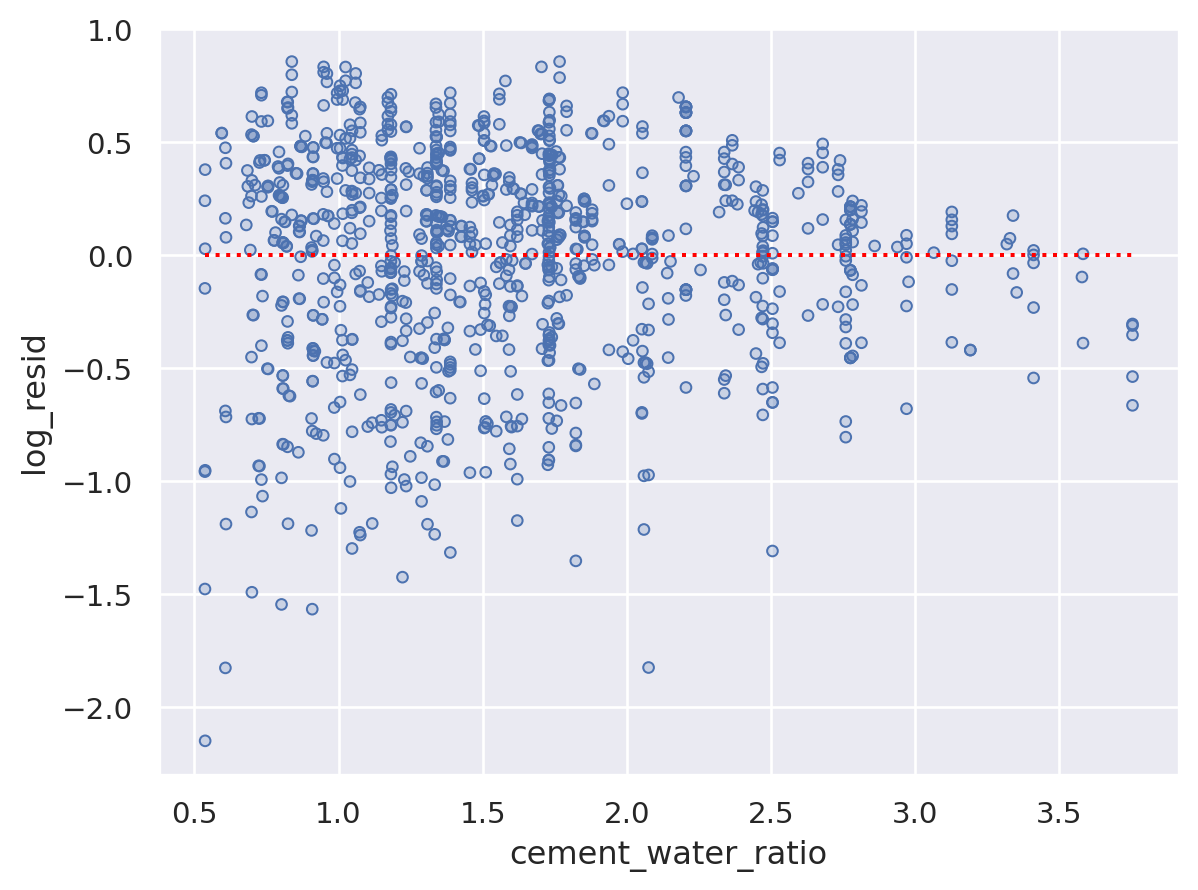

In [218]:
(
    so.Plot(concrete2, x='cement_water_ratio', y='log_resid')
    .add(so.Dots())
    .add(so.Line(linestyle=":", color="red"), so.Agg(lambda x: 0))
)

In [219]:
# nested models
from statsmodels.formula.api import ols
diamonds2_mod1 = ols("lConcreteCompressiveStrength ~ cement_water_ratio", data=concrete2).fit()
diamonds2_mod2 = ols("lConcreteCompressiveStrength ~ cement_water_ratio + Superplasticizer", data=concrete2).fit()
diamonds2_mod3 = ols("lConcreteCompressiveStrength ~ cement_water_ratio + Age", data=concrete2.query('Age<100')).fit()

<ipython-input-220-9572bdbde2e3>:7: FutureWarning: This dataframe has a column name that matches the 'value_name' column name of the resulting Dataframe. In the future this will raise an error, please set the 'value_name' parameter of DataFrame.melt to a unique name.
  concrete2_mods = concrete2_mods.melt(


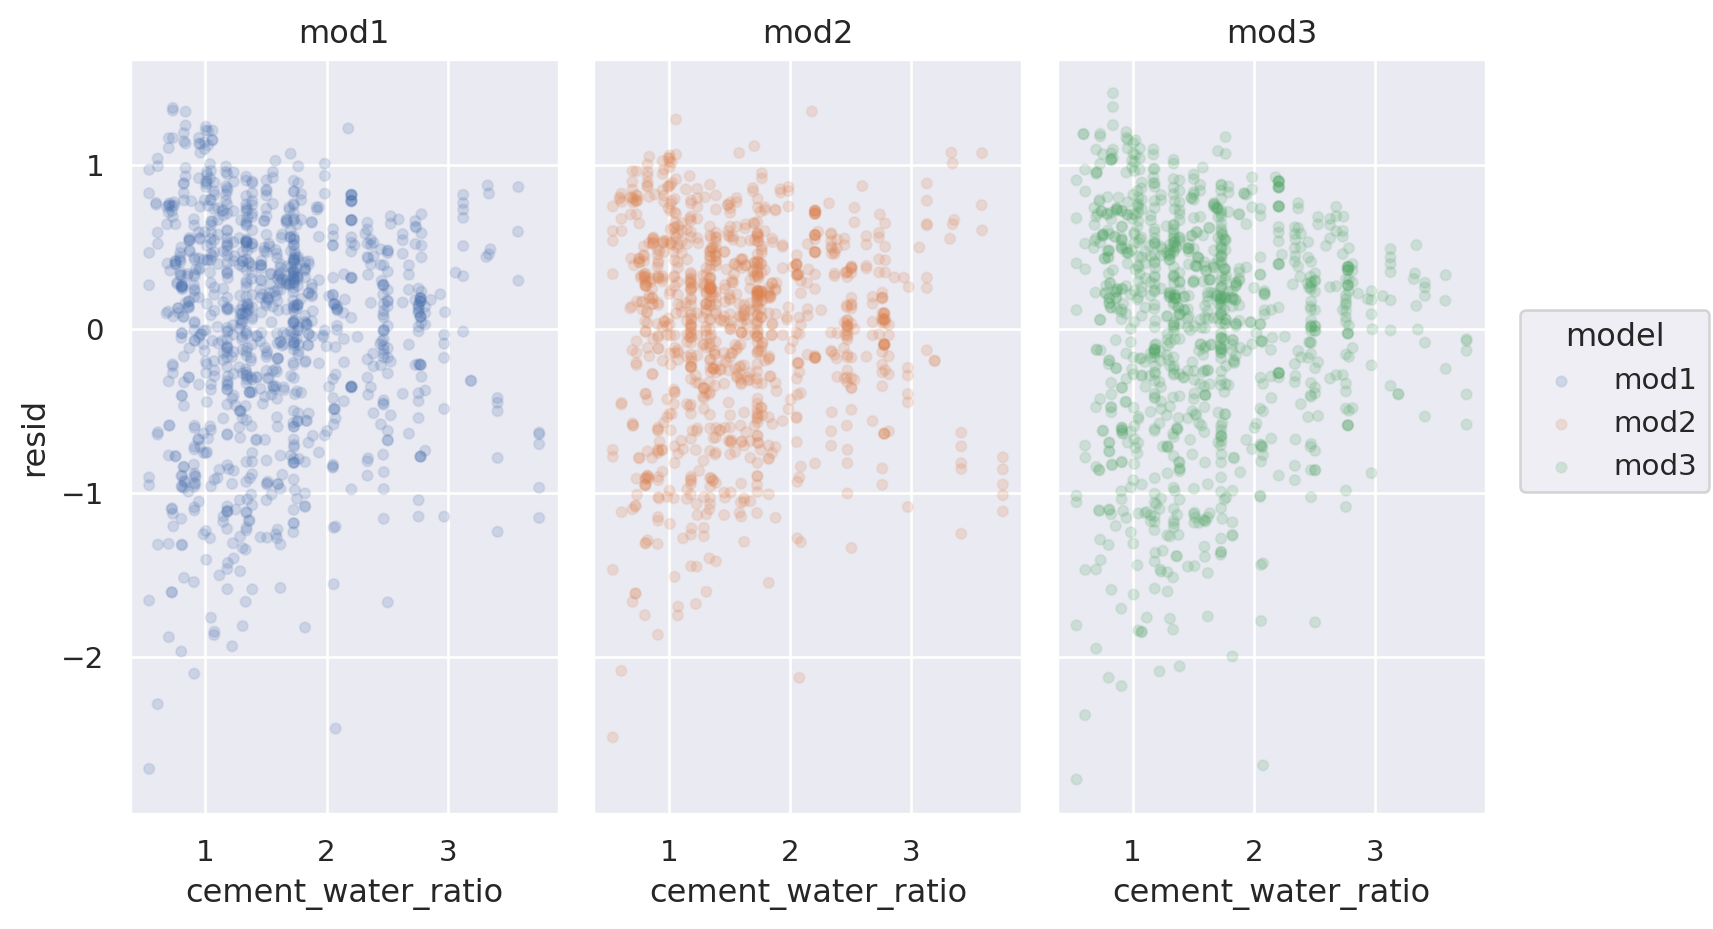

In [220]:
concrete2_mods = concrete2.assign(
    mod1=concrete2_mod1.resid,
    mod2=concrete2_mod2.resid,
    mod3=concrete2_mod3.resid,
)

concrete2_mods = concrete2_mods.melt(
    id_vars=["cement_water_ratio", "lConcreteCompressiveStrength"],
    value_vars=["mod1", "mod2", "mod3"],
    var_name="model",
    value_name="resid",
)

(
    so.Plot(concrete2_mods, x='cement_water_ratio', y='resid', color='model')
    .add(so.Dots(alpha=.1))
    .facet("model")
    .layout(size=(8, 5))
)

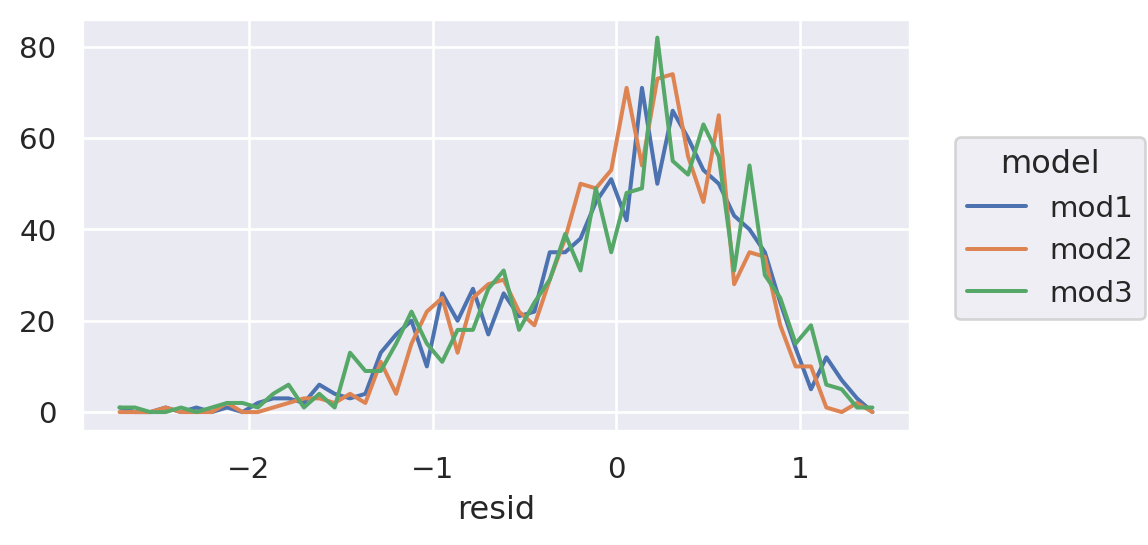

In [221]:
(
    so.Plot(concrete2_mods, x='resid', color='model')
    .add(so.Line(), so.Hist(bins=50))
    .layout(size=(5, 3))
)

In [222]:
from statsmodels.tools.eval_measures import rmse, meanabs

mods = [concrete2_mod1, concrete2_mod2, concrete2_mod3]
y = concrete2.ConcreteCompressiveStrength
print("The prediction accuracy of the models (original unit except R-squared):\n")

for mod in mods:
    y_hat = 2**mod.fittedvalues
    R2 = mod.rsquared

    print(
        f"R-squared: {R2:.2f}, RMSE: {rmse(y, y_hat):.2f}, "
        f"MAE:{meanabs(y, y_hat):.2f}"
    )

The prediction accuracy of the models (original unit except R-squared):

R-squared: 0.31, RMSE: 14.23, MAE:11.44
R-squared: 0.45, RMSE: 14.10, MAE:10.64
R-squared: 0.26, RMSE: 14.12, MAE:11.59


"lConcreteCompressiveStrength ~ cement_water_ratio + Superplasticizer" 해당 식이

"lConcreteCompressiveStrength ~ lcement + Superplasticizer + Age + Water" 보다
더 적은 갯수의 변수를 사용했음에도 불구하고 비슷한
R-squared 값을 나타내고 있음


In [260]:
concrete2_mods = ols("lConcreteCompressiveStrength ~ cement_water_ratio + Superplasticizer", data=concrete2).fit()
concrete2_mods_interact = ols("lConcreteCompressiveStrength ~ cement_water_ratio * Superplasticizer", data=concrete2).fit()

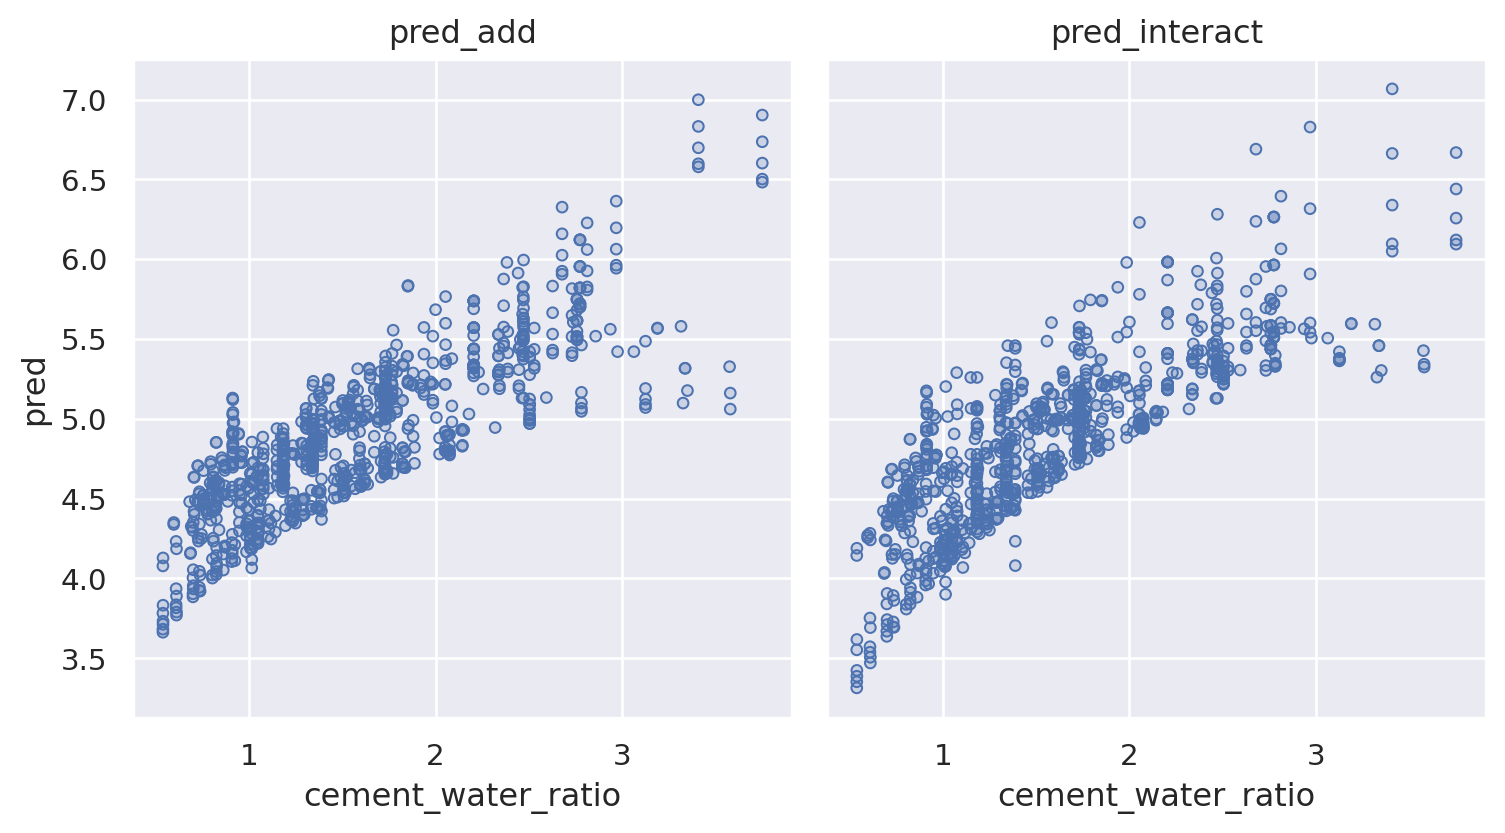

In [264]:
concrete2_mods = concrete2.query('Age<100').assign(
    pred_add=concrete2_mod2.fittedvalues,
    pred_interact=concrete2_mod2_interact.fittedvalues,
)

concrete2_mods = concrete2_mods.melt(
    id_vars=["cement_water_ratio", "lConcreteCompressiveStrength",  "Superplasticizer"],
    value_vars=["pred_add", "pred_interact"],
    var_name="model",
    value_name="pred",
)

(
    so.Plot(concrete2_mods, x='cement_water_ratio', y='pred')
    .add(so.Dots())
    .facet("model")
    .layout(size=(8, 4.5))
)

# Linear Regression

In [184]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [185]:
X.var()

Cement               10921.74
BlastFurnaceSlag      7444.08
FlyAsh                4095.55
Water                  456.06
                       ...   
CoarseAggregate       6045.66
FineAggregate         6428.10
Age                   3990.44
cement_water_ratio       0.42
Length: 9, dtype: float64

In [186]:
for column in X.columns:
    X[column] += 1
    X[column] = np.log(X[column])

In [187]:
X.var()

Cement               0.14
BlastFurnaceSlag     5.82
FlyAsh               5.64
Water                0.01
                     ... 
CoarseAggregate      0.01
FineAggregate        0.01
Age                  1.00
cement_water_ratio   0.06
Length: 9, dtype: float64

In [188]:
# splitting data into training and test set

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [189]:
# scaling data

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [190]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [191]:
lr.score(X_train, y_train)

0.8069829308072225

In [192]:
lr.score(X_test, y_test)

0.7793687996723605

overfiting이 살짝 생긴 것으로 보임


- 전체적으로 가장 강한 상관관계: 물(Water)과 고성능 플라스틱화제(Superplasticizer)
- 시멘트(Cement)는 힘(Strength)과 가장 높은 상관관계를 가지고 있습니다.
- 시멘트/물 비율(Cement/Water Ratio) 변수를 공학적으로 설계한 후, 이 변수가 힘과 가장 높은 상관관계를 가지고 있습니다.
- 나이(Age) 또한 힘과는 상당한 상관관계를 가지고 있습니다.